## ML_project 12조 EDA 취합
- 조원 : 박성원, 안희수, 김한길, 이채영, 김지혜
- TL : 박성원

## PUBG – PlayerUnknown’s Battle Grounds 배틀그라운드
 배틀로얄 방식의 게임, 100명의 플레이어가 비행기에서 뛰어내려 무기를 파밍하고 마주치면 싸우면서 제거, 강탈하며 
 
 최후의 1인(혹은 한팀)이 살아남을 때까지 진행하는 게임. 
  
  블루존(Blue Circle) 안에서 경기가 진행되며 이 밖에서는 자기장에 의해 사망한다. 
  
  데이터(2018.8.5)는 PUBG Developer API에 의해 구성되었으며, 65000게임의 플레이어 데이터를 트레이닝과 테스트 용으로 나눠놨다. 
  
  우승을 하기 위한 최적의 방법은 무엇일까?

### 컨셉 
- 상위 랭커들의 행동 지표를 파악하여 배린이들의 승률 올리기위한 가이드라인 만들기

### 공통 Setting

In [3]:
# font setting
from matplotlib import font_manager, rc
font_list = font_manager.findSystemFonts(fontpaths = None, fontext = 'ttf')

font_path = '/Users/krc/Library/Fonts/D2Coding-Ver1.3.2-20180524.ttf' 
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
# 필요모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [5]:
# dataframe setting
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)

pandas version:  1.4.2


In [6]:
# 각자 경로에 맞게 입력하기
data = pd.read_csv('/Users/krc/Downloads/train_V2.csv') 
df = data.copy()

In [7]:
# 용량 줄이는 코드 -> kernel 끊김 방지 
def reduce_mem_usage(memory_df,verbose=True):
    numerics = ['int16','int32','int64','float16','float32','float64']
    start_mem = memory_df.memory_usage().sum()/1024**2
    for col in memory_df.columns:
        col_type = memory_df[col].dtypes
        if col_type in numerics:
            c_min = memory_df[col].min()
            c_max = memory_df[col].max()
            if str(col_type)[:3]=='int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    memory_df[col] = memory_df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    memory_df[col] = memory_df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    memory_df[col] = memory_df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    memory_df[col] = memory_df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    memory_df[col] = memory_df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    memory_df[col] = memory_df[col].astype(np.float32)
                else: 
                    memory_df[col] = memory_df[col].astype(np.float64)
    end_mem = memory_df.memory_usage().sum()/1024**2
    if verbose : print('Meme usage decrease to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100*(start_mem - end_mem)/start_mem))
    return memory_df

reduce_mem_usage(df)

Meme usage decrease to 288.39 Mb (70.7% reduction)


Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0            0.00000      0              0      0         60        1241   
1           91.50000      0              0      0         57           0   
2           68.00000      0              0      0         47           0   
3           32.90625      0              0      0         75           0   
4          100.00000      0              0      0         45           0   
...              ...    ...            ...    ...        ...         ...   
4446961      0.00000      0              0      0         74        1029   
4446962     44.15625      0              0      0         69           0   
4446963     59.06250      0              0      0         66           0   
4446964    180.37500      1              1      2         11           0   
4446965    268.00000      0              0      1         18           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0            0            0      0.00000           1306  squad-fpp        28   
1            0            0      0.00000           1777  squad-fpp        26   
2            0            0      0.00000           1318        duo        50   
3            0            0      0.00000           1436  squad-fpp        31   
4            1            1     58.53125           1424   solo-fpp        97   
...        ...          ...          ...            ...        ...       ...   
4446961      0            0      0.00000           1873  squad-fpp        29   
4446962      0            0      0.00000           1435       solo        93   
4446963      0            0      0.00000           1321  squad-fpp        28   
4446964      2            1     98.50000           1373  squad-fpp        26   
4446965      2            1     78.25000           1766   solo-fpp        98   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
0               26          -1        0      0.000000          0   
1               25        1484        0      0.004501          0   
2               47        1491        0      0.000000          0   
3               30        1408        0      0.000000          0   
4               95        1560        0      0.000000          0   
...            ...         ...      ...           ...        ...   
4446961         28          -1        0   1292.000000          0   
4446962         93        1501        0      0.000000          0   
4446963         28        1500        0      0.000000          0   
4446964         25        1418        2      0.000000          0   
4446965         94        1590        0   1369.000000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0            0.000000          0                0      244.7500   
1           11.039062          0                0     1434.0000   
2            0.000000          0                0      161.7500   
3            0.000000          0                0      202.7500   
4            0.000000          0                0       49.7500   
...            

### 데이터 확인

In [8]:
df.head(10)

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
5  ff79c12f326506  289a6836a88d27  bac52627a12114        0       0   
6  95959be0e21ca3  2c485a1ad3d0f1  a8274e903927a2        0       0   
7  311b84c6ff4390  eaba5fcb7fc1ae  292611730ca862        0       0   
8  1a68204ccf9891  47cfbb04e1b1a2  df014fbee741c6        0       0   
9  e5bb5a43587253  759bb6f7514fd2  3d3031c795305b        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
0     0.000000      0              0      0         60        1241      0   
1    91.500000      0              0      0         57           0      0   
2    68.000000      0              0      0         47           0      0   
3    32.906250      0              0      0         75           0      0   
4   100.000000      0              0      0         45           0      1   
5   100.000000      1              1      0         44           0      1   
6     0.000000      0              0      0         96        1262      0   
7     8.539062      0              0      0         48        1000      0   
8    51.593750      0              0      0         64           0      0   
9    37.281250      0              0      0         74           0      0   

   killStreaks  longestKill  matchDuration  matchType  maxPlace  numGroups  \
0            0      0.00000           1306  squad-fpp        28         26   
1            0      0.00000           1777  squad-fpp        26         25   
2            0      0.00000           1318        duo        50         47   
3            0      0.00000           1436  squad-fpp        31         30   
4            1     58.53125           1424   solo-fpp        97         95   
5            1     18.43750           1395  squad-fpp        28         28   
6            0      0.00000           1316  squad-fpp        28         28   
7            0      0.00000           1967   solo-fpp        96         92   
8            0      0.00000           1375      squad        28         27   
9            0      0.00000           1930      squad        29         27   

   rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
0          -1        0      0.000000          0      0.000000          0   
1        1484        0      0.004501          0     11.039062          0   
2        1491        0      0.000000          0      0.000000          0   
3        1408        0      0.000000          0      0.000000          0   
4        1560        0      0.000000          0      0.000000          0   
5        1418        0      0.000000          0      0.000000          0   
6          -1        0      0.000000          0      0.000000          0   
7          -1        0   2004.000000          0      0.000000          0   
8        1493        0      0.000000          0      0.000000          0   
9        1349        0      0.000000          0      0.000000          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0                0      244.7500                1       1466      0.444336  
1                0     1434.0000                5          0      0.640137  
2                0      161.7500                2          0      0.775391  
3                0      202.7500                3          0      0.166748  
4                0       49.7500                2          0      0.187500  
5                0       34.6875                1          0      0.036987  
6                0       13.5000                1       1497      0.000000  
7                0     1089.0000                6       1500      0.736816  
8      

In [9]:
df.info(verbose=True, null_counts=True)
df.info()

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_2822/2663644300.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               4446966 non-null  object 
 1   groupId          4446966 non-null  object 
 2   matchId          4446966 non-null  object 
 3   assists          4446966 non-null  int8   
 4   boosts           4446966 non-null  int8   
 5   damageDealt      4446966 non-null  float16
 6   DBNOs            4446966 non-null  int8   
 7   headshotKills    4446966 non-null  int8   
 8   heals            4446966 non-null  int8   
 9   killPlace        4446966 non-null  int8   
 10  killPoints       4446966 non-null  int16  
 11  kills            4446966 non-null  int8   
 12  killStreaks      4446966 non-null  int8   
 13  longestKill      4446966 non-null  float16
 14  matchDuration    4446966 non-null  int16  
 15  matchType        4446966 non-null  object 
 16  maxPlace         4

In [10]:
# null값 제거하기
df.dropna()

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0            0.00000      0              0      0         60        1241   
1           91.50000      0              0      0         57           0   
2           68.00000      0              0      0         47           0   
3           32.90625      0              0      0         75           0   
4          100.00000      0              0      0         45           0   
...              ...    ...            ...    ...        ...         ...   
4446961      0.00000      0              0      0         74        1029   
4446962     44.15625      0              0      0         69           0   
4446963     59.06250      0              0      0         66           0   
4446964    180.37500      1              1      2         11           0   
4446965    268.00000      0              0      1         18           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0            0            0      0.00000           1306  squad-fpp        28   
1            0            0      0.00000           1777  squad-fpp        26   
2            0            0      0.00000           1318        duo        50   
3            0            0      0.00000           1436  squad-fpp        31   
4            1            1     58.53125           1424   solo-fpp        97   
...        ...          ...          ...            ...        ...       ...   
4446961      0            0      0.00000           1873  squad-fpp        29   
4446962      0            0      0.00000           1435       solo        93   
4446963      0            0      0.00000           1321  squad-fpp        28   
4446964      2            1     98.50000           1373  squad-fpp        26   
4446965      2            1     78.25000           1766   solo-fpp        98   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
0               26          -1        0      0.000000          0   
1               25        1484        0      0.004501          0   
2               47        1491        0      0.000000          0   
3               30        1408        0      0.000000          0   
4               95        1560        0      0.000000          0   
...            ...         ...      ...           ...        ...   
4446961         28          -1        0   1292.000000          0   
4446962         93        1501        0      0.000000          0   
4446963         28        1500        0      0.000000          0   
4446964         25        1418        2      0.000000          0   
4446965         94        1590        0   1369.000000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0            0.000000          0                0      244.7500   
1           11.039062          0                0     1434.0000   
2            0.000000          0                0      161.7500   
3            0.000000          0                0      202.7500   
4            0.000000          0                0       49.7500   
...            

- matchId, matchType을 통한 match 확인

In [11]:
df_match = df[['matchId','matchType']].drop_duplicates()
df_match

matchId        matchType
0        a10357fd1a4a91        squad-fpp
1        aeb375fc57110c        squad-fpp
2        110163d8bb94ae              duo
3        f1f1f4ef412d7e        squad-fpp
4        6dc8ff871e21e6         solo-fpp
...                 ...              ...
1681990  dc5e44d25926fc   normal-duo-fpp
1687610  7ae14295044ffe             solo
2001591  21beed46753ed9   normal-duo-fpp
2744604  224a123c53e008         solo-fpp
2876351  fcad6c3fdd847a  normal-solo-fpp

[47965 rows x 2 columns]

In [12]:
# 주어진 데이터에서 열린 대회 횟수
df_match['matchType'].value_counts()

squad-fpp           18576
duo-fpp             10620
squad                6658
solo-fpp             5679
duo                  3356
solo                 2297
normal-squad-fpp      358
normal-duo-fpp        158
normal-solo-fpp        96
crashfpp               73
flaretpp               29
normal-solo            23
normal-squad           16
normal-duo             12
flarefpp                9
crashtpp                5
Name: matchType, dtype: int64

- 각 컬럼 별로 상관관계 확인

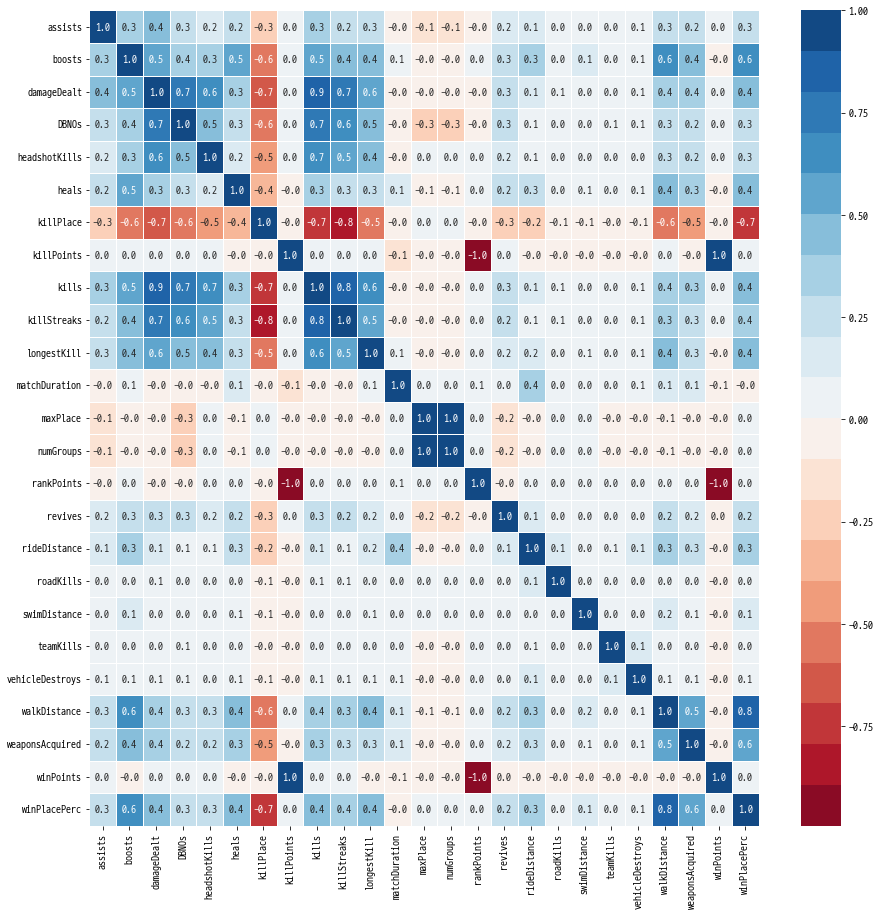

In [13]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("RdBu", 20))

plt.show() 

### 김지혜 - DBNOs, assist, revives, teamKills

In [14]:
df1 = df.copy()

In [15]:
# matchType 평범한 게임, 결측지 제거
df1 = df1.dropna()
name_list = ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo']
df1 = df1[df1["matchType"].isin(name_list) == True]

In [16]:
df1.describe()[['DBNOs','assists','revives','teamKills']]

DBNOs       assists       revives     teamKills
count  4.411698e+06  4.411698e+06  4.411698e+06  4.411698e+06
mean   6.541452e-01  2.287636e-01  1.642769e-01  2.363784e-02
std    1.124138e+00  5.704109e-01  4.708394e-01  1.660773e-01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
max    3.200000e+01  1.200000e+01  3.900000e+01  4.000000e+00

#### DBNOs - 기절시킨 횟수

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DBNOs', ylabel='count'>

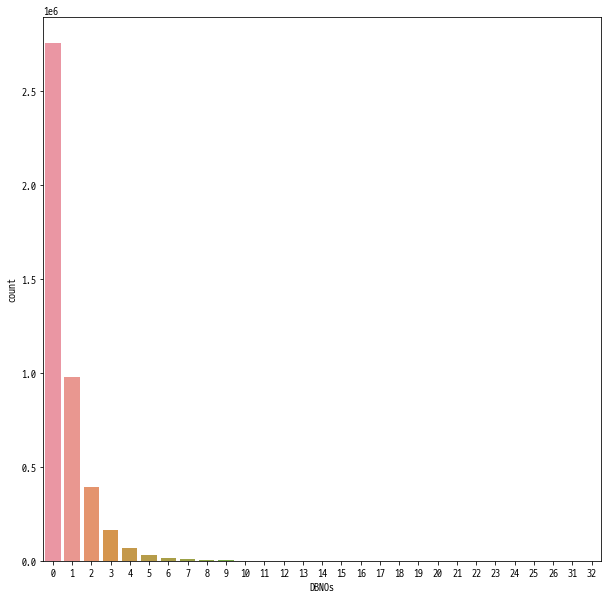

In [17]:
# DBNOs 확인
# 0은 헤드샷이거나 솔로 혹은 팀원 중 마지막에 살아있는 경우
plt.figure(figsize=(10,10))
sns.countplot(df1.DBNOs)

In [18]:
# 평균값 확인
level_1q = df1['DBNOs'].quantile(0.25)
level_3q = df1['DBNOs'].quantile(0.75)
IQR = level_3q - level_1q
level_3q + (1.5 * IQR)

2.5

In [19]:
# 해당값 확인
df1.DBNOs.unique()

array([ 0,  1,  6,  4,  3,  2,  5, 10,  8,  7,  9, 13, 12, 11, 24, 14, 15,
       21, 17, 18, 16, 20, 19, 25, 31, 22, 26, 23, 32], dtype=int8)

In [20]:
# 헤드샷 26번 가능한가?
df1[df1.DBNOs >= 32]

Id         groupId         matchId  assists  boosts  \
3840888  7614924933b454  7de402ea23a8ef  59e23ee8543fd2        7      19   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
3840888       3796.0     32             26      4          1        1613   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
3840888     33            4       227.25           1961     squad        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
3840888         25          -1        0        4584.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
3840888     12.476562          0                0        4484.0   

         weaponsAcquired  winPoints  winPlacePerc  
3840888                6       1515           1.0

In [21]:
df1.matchType[df1.DBNOs == 32]

3840888    squad
Name: matchType, dtype: object

In [22]:
df1[df1.groupId == '7de402ea23a8ef'] 

Id         groupId         matchId  assists  boosts  \
1525264  9af1e014b50230  7de402ea23a8ef  59e23ee8543fd2        1       9   
3669907  19a96f0169f6c8  7de402ea23a8ef  59e23ee8543fd2        3       6   
3840888  7614924933b454  7de402ea23a8ef  59e23ee8543fd2        7      19   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
1525264        760.0      3              2      4          3        1548   
3669907        386.5      2              3      8          2        1167   
3840888       3796.0     32             26      4          1        1613   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
1525264      3            1     51.84375           1961     squad        27   
3669907      4            1     85.93750           1961     squad        27   
3840888     33            4    227.25000           1961     squad        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
1525264         25          -1        1        4348.0          0   
3669907         25          -1        3        4140.0          0   
3840888         25          -1        0        4584.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
1525264     17.234375          0                0        2934.0   
3669907     21.265625          0                0        3380.0   
3840888     12.476562          0                0        4484.0   

         weaponsAcquired  winPoints  winPlacePerc  
1525264                7       1568           1.0  
3669907                4       1497           1.0  
3840888                6       1515           1.0

In [23]:
df1.loc[df1['DBNOs'] > df1['DBNOs'].quantile(0.99)].DBNOs.value_counts()

6     14676
7      7059
8      3519
9      1818
10      977
11      531
12      350
13      188
14      112
15       78
16       49
17       41
18       25
19       14
20       12
21        8
25        4
22        3
24        2
26        2
23        2
31        1
32        1
Name: DBNOs, dtype: int64

In [24]:
# 상위 99% 벗어나는 데이터 
# df.loc[df['DBNOs'] > df['DBNOs'].quantile(0.99)] = 6 <- 이상치 6으로 다 합치는 코드 
df.loc[df['DBNOs'] > df['DBNOs'].quantile(0.99)].DBNOs.value_counts()

6     14977
7      7291
8      3694
9      1966
10     1110
11      643
12      466
13      275
14      177
15      137
16       87
17       80
18       64
19       34
20       30
21       26
22       18
25       16
23       14
26       11
24       10
33        7
27        6
31        3
28        3
32        3
39        2
29        1
30        1
35        1
40        1
38        1
53        1
Name: DBNOs, dtype: int64

In [25]:
# DBNOs remove outliers
df1.drop(df1[df1['DBNOs'] > 6].index, inplace= True)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DBNOs', ylabel='count'>

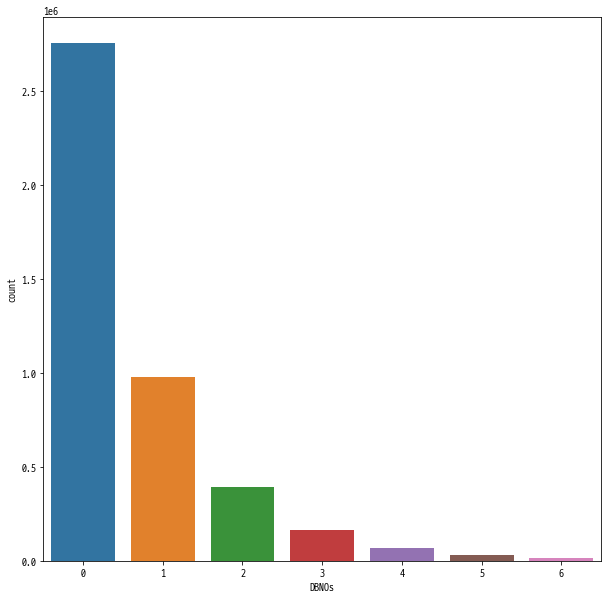

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(df1.DBNOs)

#### assists - 상대방을 죽이는걸 도왔을 때, 직접적인 가해가 있어야 스코어가 오른다.
- assists가 많을수록 winners될 확률이 높다.
- 5 ~ assist : rare
- 10 ~ ???? : cheater ?
- more asissts -> teammate killed = team wins or strong

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


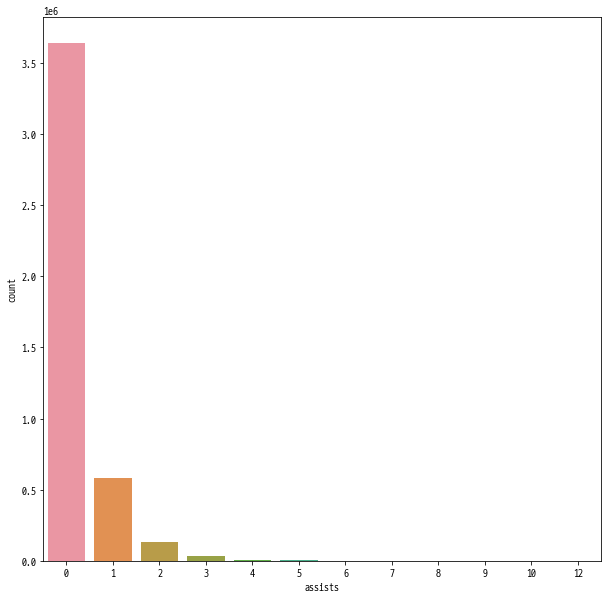

In [27]:
# assists  확인
plt.figure(figsize=(10,10))
sns.countplot(df1.assists)
plt.show()

In [28]:
# 해당값 확인
df1.assists.unique()

array([ 0,  1,  3,  2,  4,  6,  5,  7,  8,  9, 12, 10], dtype=int8)

In [29]:
df1[df1.assists == 12]

Id         groupId         matchId  assists  boosts  \
1965599  845ace028edf6b  81f2a6bdfe7fdb  5bd37757447283       12       7   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
1965599        808.5      1              2      4          3           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
1965599      4            1       27.125           1250  squad-fpp        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
1965599         27        1334        1         523.5          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
1965599           0.0          0                0        3066.0   

         weaponsAcquired  winPoints  winPlacePerc  
1965599                4          0      0.961426

In [30]:
# 스쿼드라 12번 충분히 가능하다고 판단 / 이상치 제거 x
df1.matchType[df1.groupId == '81f2a6bdfe7fdb']

1965599    squad-fpp
2360932    squad-fpp
2626270    squad-fpp
Name: matchType, dtype: object

#### revives - 팀원 소생시킨 횟수, 기절상태가 될 때 살릴 수 있다.

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revives', ylabel='count'>

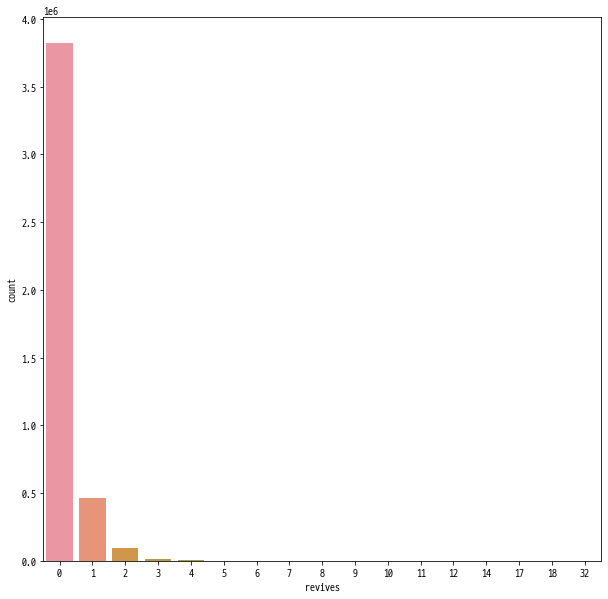

In [31]:
# revives 확인
plt.figure(figsize=(10,10))
sns.countplot(df1.revives)

In [32]:
# 해당값 확인
df1.revives.unique()

array([ 0,  1,  3,  2,  4,  5,  6,  9,  7,  8, 17, 11, 18, 14, 12, 10, 32],
      dtype=int8)

In [33]:
df1[df1.revives >= 32]

Id         groupId         matchId  assists  boosts  \
4193891  11bf706b9dcb6a  dc5189d802fba2  289bff11ad634a        0       9   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
4193891        327.0      1              1     12         10        1337   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
4193891      3            2      91.9375           1953       duo        48   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
4193891         46          -1       32        280.25          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
4193891           0.0          0                0        1299.0   

         weaponsAcquired  winPoints  winPlacePerc  
4193891               11       1534      0.787109

In [34]:
df1.matchType[df1.revives >= 32]

4193891    duo
Name: matchType, dtype: object

In [35]:
# 상위 99% 벗어나는 데이터 
df1.loc[df1['revives'] > df1['revives'].quantile(0.99)].revives.value_counts()

3     16490
4      2863
5       519
6        92
7        30
8        12
9         4
11        4
14        4
10        3
17        1
18        1
12        1
32        1
Name: revives, dtype: int64

In [36]:
df1.revives.value_counts()

0     3822633
1      461626
2       92618
3       16490
4        2863
5         519
6          92
7          30
8          12
9           4
11          4
14          4
10          3
17          1
18          1
12          1
32          1
Name: revives, dtype: int64

In [37]:
# remove outliers
#df.loc[df.revives >= 4,'revives'] = 4
df1.drop(df1[df1['revives'] > 3].index, inplace= True)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revives', ylabel='count'>

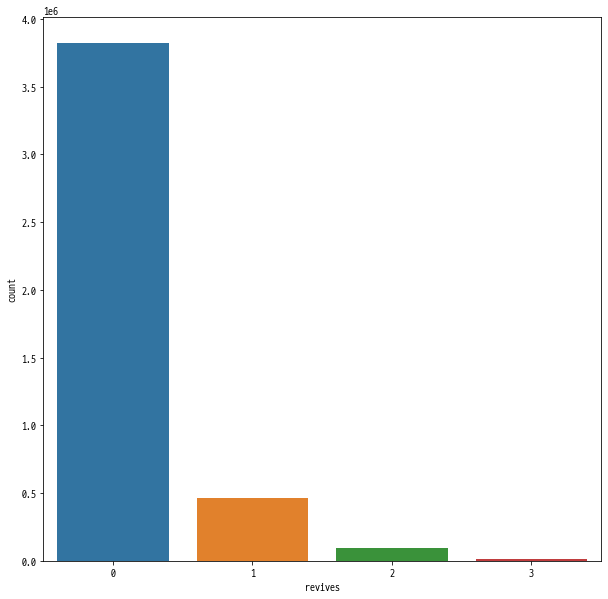

In [38]:
plt.figure(figsize=(10,10))
sns.countplot(df1.revives)

#### teamkills - 팀원 죽인 횟수 (drop 예정)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='teamKills', ylabel='count'>

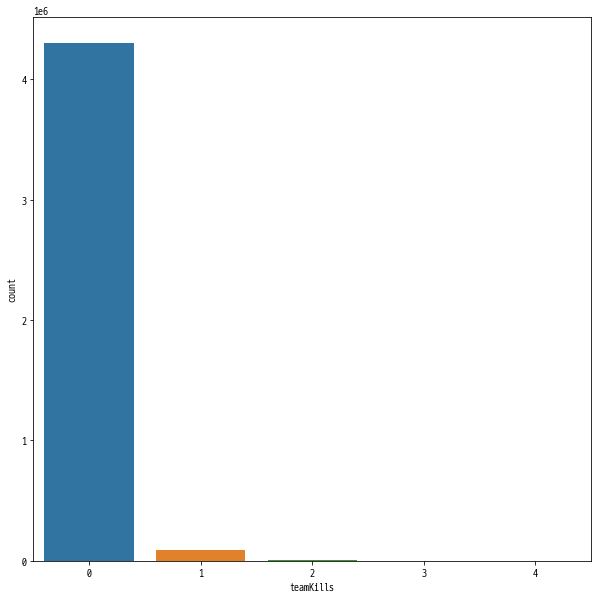

In [39]:
# teamKills 확인 
plt.figure(figsize=(10,10))
sns.countplot(df1.teamKills)

In [40]:
# 해당값 확인
df1.teamKills.unique()

array([0, 1, 2, 3, 4], dtype=int8)

In [41]:
# solo인 경우 teamKills
V = df1[df1.matchType == 'solo']
V.teamKills.value_counts()

0    179215
1      2728
Name: teamKills, dtype: int64

In [42]:
# duo, squad 경우 teamKills
R = df1[df1.matchType != 'solo']
R.teamKills.value_counts()

0    4119550
1      83986
2       7031
3        786
4         71
Name: teamKills, dtype: int64

In [43]:
# 팀킬 3,4번한 사람들의 연관성 X (팀킬을 꾸준히 하는지 확인하려했는데 겹치는 Id가 없음 )
R = df1[df1.matchType != 'solo']
R[(R.teamKills == 3) | (R.teamKills == 4)]

Id         groupId         matchId  assists  boosts  \
939      b9d12e698bbecc  12e4e0f11b9b26  c78603d9ea8e3d        1       1   
1979     2fd411ab25fc89  25226091b29ec0  838cb29103410a        0       0   
7259     bb8858aefdb39b  6497251ef13d14  681b7e6ea05b36        0       0   
18553    a9fd4501bd914f  6b37becdd69468  932490f1044da1        0       0   
20216    9640f91ccec58d  e46f8d4a48207c  a5791383b5f1c6        0       0   
...                 ...             ...             ...      ...     ...   
4424601  2ba5f084f5d51b  de43dea51983eb  582322ece6a6d3        2       0   
4426217  ab8983981c2019  89ec5c012d0b4f  cca6455e350a3d        0       2   
4427777  b4984fc895d203  a2f0a1a24b89dc  53b544b4920a35        0       1   
4432043  208f441ec8f933  0906542c4beb26  ca64f6298e6b43        0       3   
4439703  3c7b6c0503719a  1986a9aa64a6a2  629af6fd286ccc        0       6   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
939        26.187500      2              0      1         70           0   
1979       65.000000      2              0      0         96        1284   
7259      200.000000      5              2      0         14           0   
18553     313.000000      3              0      0         62        1032   
20216     474.750000      4              0      0         20        1711   
...              ...    ...            ...    ...        ...         ...   
4424601   191.875000      3              0      0         64           0   
4426217     0.000000      0              0      5         71           0   
4427777   453.500000      3              0      1         24        1646   
4432043    11.609375      3              0      1         70           0   
4439703    70.000000      3              0      9         38         979   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
939          0            0     0.000000           1877      squad        27   
1979         0            0     0.000000           1300  squad-fpp        27   
7259         2            2     1.275391           1302      squad        26   
18553        0            0     0.000000           1267  squad-fpp        30   
20216        2            2     5.226562           1370  squad-fpp        30   
...        ...          ...          ...            ...        ...       ...   
4424601      0            0     0.000000           1903  squad-fpp        28   
4426217      0            0     0.000000           1745  squad-fpp        30   
4427777      1            1     6.007812           1404  squad-fpp        34   
4432043      0            0     0.000000           1801  squad-fpp        26   
4439703      0            0     0.000000           1938      squad        26   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
939             25        1435        0       2312.00          0   
1979            25          -1        0          0.00          0   
7259            24        1415        0        259.25          0   
18553           29          -1        0          0.00          0   
20216           29          -1        0          0.00          0   
...            ...         ...      ...           ...        ...   
4424601         28        1640        0          0.00          0   
4426217         30        1478        0        261.75          0   
4427777         34          -1        0          0.00          0   
4432043         26        1443        0          0.00          0   
4439703         25          -1        1        678.00          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
939               0.0          3                0      610.0000   
1979              0.0          3                0       53.8125   
7259              0.0          3                0      177.2500   
18553             0.0          4                0      372.2500   
20216             0.0          3                0      185.2500   
...            

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


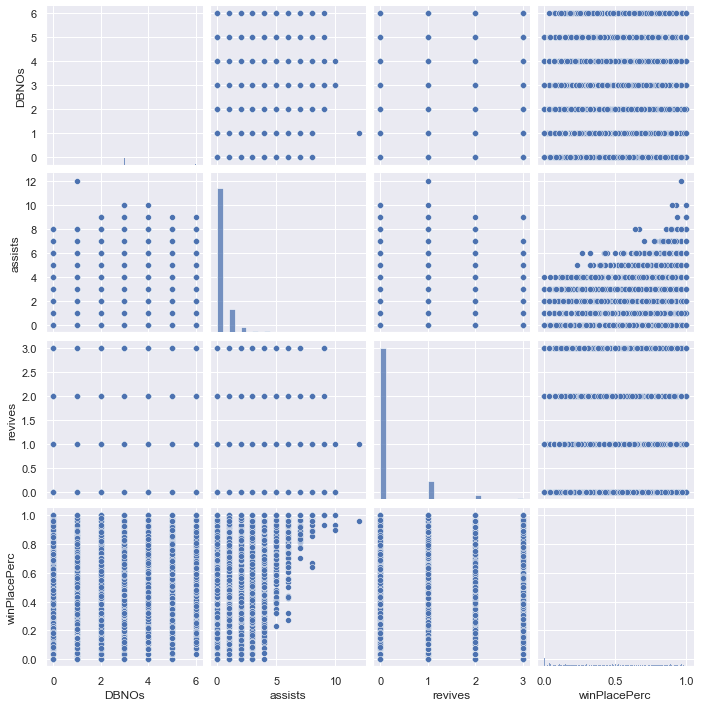

In [44]:
# 담당 컬럼들의 관계 
sns.set()
cols = ['DBNOs','assists','revives','winPlacePerc']
sns.pairplot(df1[cols], size = 2.5)
plt.show()

In [45]:
new_df = df1[['DBNOs','assists','revives','winPlacePerc']]

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_2822/3794601466.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


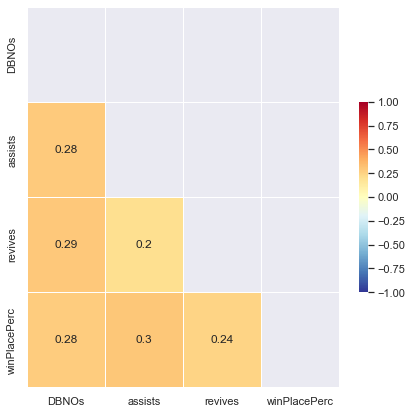

In [46]:
# teamkills를 제외한 나머지 3개는 상관관계가 높다고 판단. teamkills는 drop
corr = new_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크 (위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값 표시
            mask=mask,      # 표시하지 않을 마스크 부분 지정
            linewidths=.5,  # 경계면 실선으로 구분
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           ) 
plt.show()

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


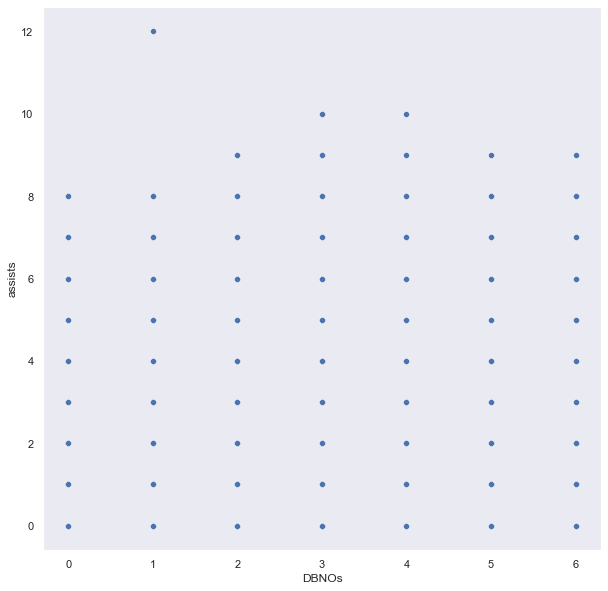

In [47]:
# 연관이 없다.
plt.figure(figsize = (10, 10))
sns.scatterplot(df1["DBNOs"], df1["assists"])
plt.grid()
plt.show()

#### DBNOs EDA 
- solo -> assists, DBNOs, revives X

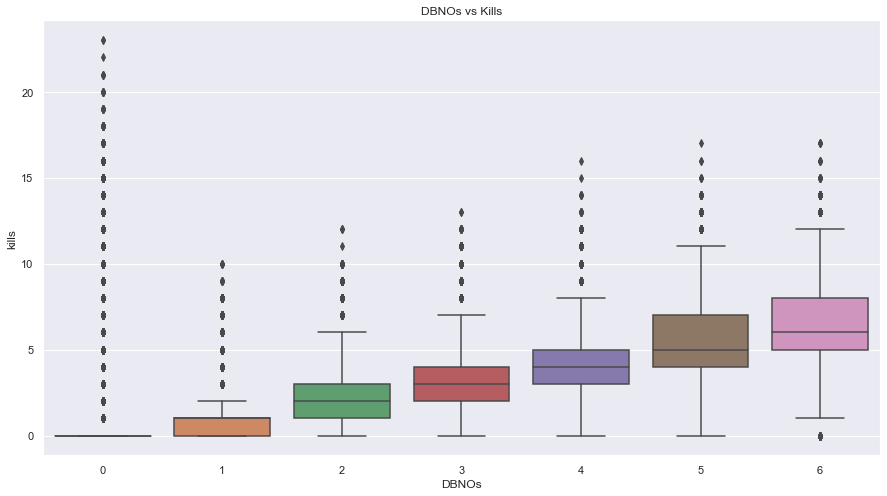

In [48]:
# DBNOs,Kills 상관관계 높음
# 보통 기절시키면 kill까지도 연결된다. DBNOs 없이 킬 점수가 높은 경우 headshot,vechicle explosion 이다.
plt.figure(figsize=(15,8))
ax2 = sns.boxplot(x="DBNOs",y="kills", data = df1)
ax2.set_title("DBNOs vs Kills")
plt.show()

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


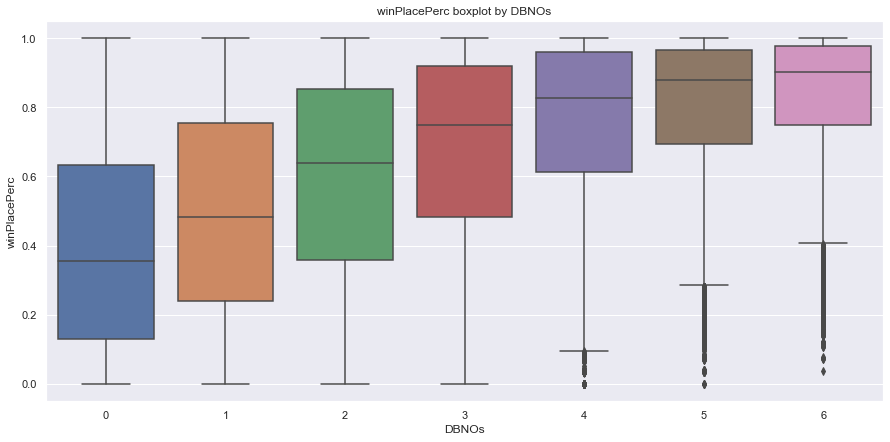

In [49]:
tt = df1[df1['matchType'].str.contains('solo') == False]
def bplot(df1, col1, col2):
    plt.figure(figsize=(15, 7))
    sns.boxplot(col1, col2, data=df1).set(title = f'{col2} boxplot by {col1}')
bplot(tt, 'DBNOs', 'winPlacePerc')

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'DBNOs 횟수에 따른 winplaceperc ')

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from cu

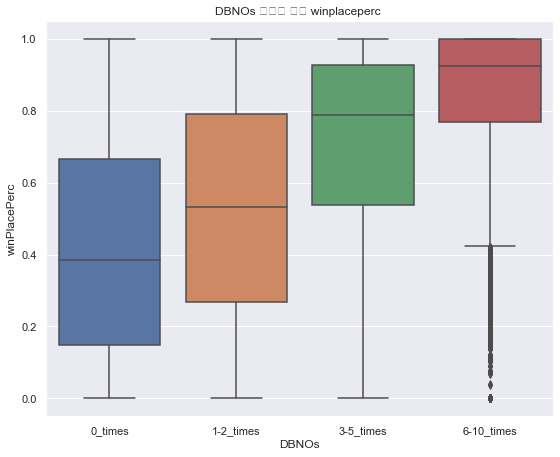

In [50]:
# DBNOs 횟수에 따른 winplaceperc 
plt.subplots(figsize=(20,16))
plt.subplot(2,2,1)
DBNOS = pd.cut(df['DBNOs'], [-1, 0, 2, 5, 10], 
               labels=['0_times','1-2_times', '3-5_times', '6-10_times'])
ax1=sns.boxplot(DBNOS,df['winPlacePerc'])
plt.title('DBNOs 횟수에 따른 winplaceperc ')

In [51]:
# Player group -> In solo no group, in duo minimum 50 group and in squad (25 * 4) minimum 25 group
solo_game = df1[df1["numGroups"] > 50]
solo = len(solo_game)

duo_game = df1[(df1["numGroups"] > 25) & (df1["numGroups"] <= 50)]
duo = len(duo_game)

squad_game = df1[df1["numGroups"] <= 25]
squad = len(squad_game)

In [52]:
"""
# duo일 때가 더 높다. 
plt.subplots(figsize=(10,10))
plt.title('matchtype 별 DBNOs 와 winplaceperc 관계')
sns.pointplot(x=duo_game["DBNOs"], y=duo_game["winPlacePerc"], color="#ff8000")
plt.text(4,0.4, "duo-DBNOs vs winPlacePerc", color="#ff8000")
sns.pointplot(x=squad_game["DBNOs"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(4,0.39, "squad-DBNOs vs winPlacePerc", color="#212126")
"""

'\n# duo일 때가 더 높다. \nplt.subplots(figsize=(10,10))\nplt.title(\'matchtype 별 DBNOs 와 winplaceperc 관계\')\nsns.pointplot(x=duo_game["DBNOs"], y=duo_game["winPlacePerc"], color="#ff8000")\nplt.text(4,0.4, "duo-DBNOs vs winPlacePerc", color="#ff8000")\nsns.pointplot(x=squad_game["DBNOs"], y=squad_game["winPlacePerc"], color="#212126")\nplt.text(4,0.39, "squad-DBNOs vs winPlacePerc", color="#212126")\n'

#### assists EDA
- winplaceperc 관계

In [54]:
"""
# assists 와 winplaceperc 관계  
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='assists', y="winPlacePerc", df=df1)
fig.axis(ymin=0, ymax=1)
"""

'\n# assists 와 winplaceperc 관계  \nf, ax = plt.subplots(figsize=(8, 6))\nfig = sns.boxplot(x=\'assists\', y="winPlacePerc", df=df1)\nfig.axis(ymin=0, ymax=1)\n'

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


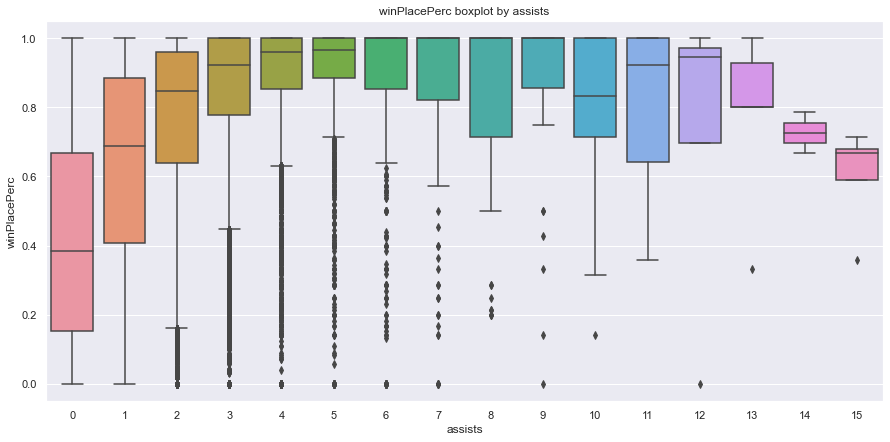

In [ ]:
tt = df[df['matchType'].str.contains('solo') == False]
def bplot(df, col1, col2):
    plt.figure(figsize=(15, 7))
    sns.boxplot(col1, col2, data=df).set(title = f'{col2} boxplot by {col1}')
bplot(tt, 'assists', 'winPlacePerc')

#### revives EDA
- winplaceperc와의 관계

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'revives 횟수에 따른 winplaceperc')

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from cu

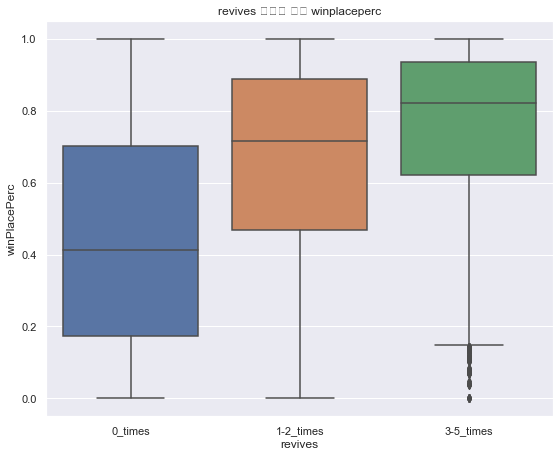

In [ ]:
# revives 횟수에 따른 winplaceperc 
plt.subplots(figsize=(20,16))
plt.subplot(2,2,2)
Revives = pd.cut(df['revives'], [-1, 0, 2, 5], 
               labels=['0_times','1-2_times', '3-5_times'])

sns.boxplot(Revives,df['winPlacePerc'])
plt.title('revives 횟수에 따른 winplaceperc')

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


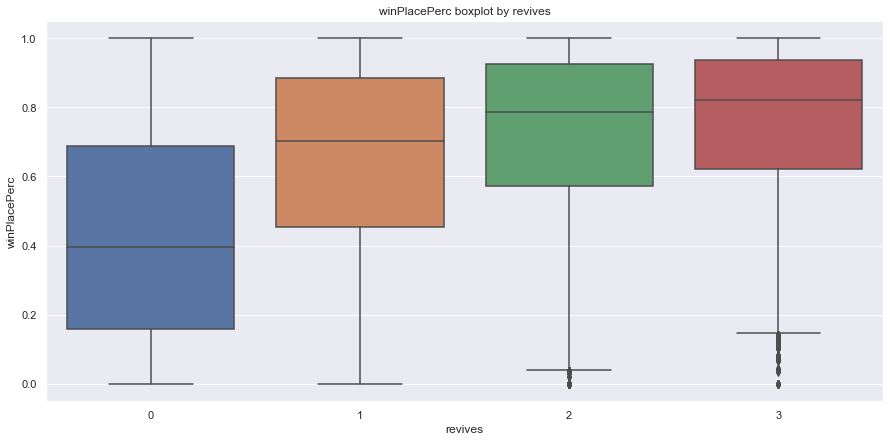

In [ ]:
tt = df[df['matchType'].str.contains('solo') == False]
def bplot(df, col1, col2):
    plt.figure(figsize=(15, 7))
    sns.boxplot(col1, col2, data=df).set(title = f'{col2} boxplot by {col1}')
bplot(tt, 'revives', 'winPlacePerc')

In [55]:
"""
plt.subplots(figsize=(10,10))
plt.title('matchtype 별 revives 와 winplaceperc 관계')
sns.pointplot(x=duo_game["revives"], y=duo_game["winPlacePerc"], color="#ff8000")
plt.text(2,0.41, "duo-revives vs winPlacePerc", color="#ff8000")
sns.pointplot(x=squad_game["revives"], y=squad_game["winPlacePerc"], color="#212126")
plt.text(2,0.39, "squad-revives vs winPlacePerc", color="#212126")
"""

'\nplt.subplots(figsize=(10,10))\nplt.title(\'matchtype 별 revives 와 winplaceperc 관계\')\nsns.pointplot(x=duo_game["revives"], y=duo_game["winPlacePerc"], color="#ff8000")\nplt.text(2,0.41, "duo-revives vs winPlacePerc", color="#ff8000")\nsns.pointplot(x=squad_game["revives"], y=squad_game["winPlacePerc"], color="#212126")\nplt.text(2,0.39, "squad-revives vs winPlacePerc", color="#212126")\n'

### 이채영 - kills, headshotKills, killStreaks, longestKill, roadKills

In [ ]:
# matchType normal인 것 찾아내기
normalList = df[df['matchType'].str.contains('normal')]['matchType'].unique()

def findisnormal(x):
    if x in normalList:
        return 1
    else:
        return 0

# matchType에 normal이 포함되는 Type이면 1을 반환하고 아니면 0을 가지는 column 생성
df['isnormal'] = df['matchType'].apply(lambda x : findisnormal(x))

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matchDuration', ylabel='Density'>

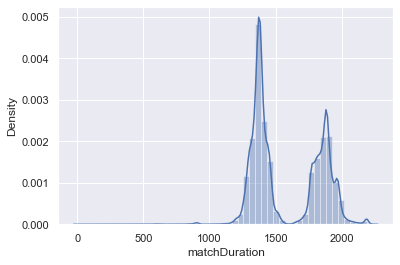

In [ ]:
sns.distplot(df['matchDuration'])

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='winPlacePerc', ylabel='Density'>

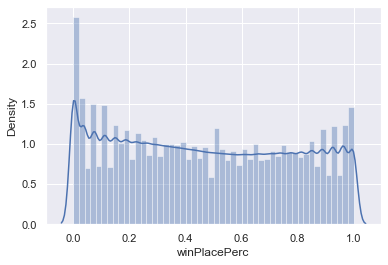

In [ ]:
sns.distplot(df['winPlacePerc'])

### 전체 데이터 vs Normal 제외한 데이터 비교 

#### 1. 전체 데이터 
- 담당 column : kills, headshotKills, killStreaks, longestKill, roadKills

In [ ]:
# 담당 column 데이터 확인
df_p = df[['groupId','matchId','kills', 'headshotKills', 'killStreaks', 'longestKill', 'roadKills']]
df_p

groupId         matchId  kills  headshotKills  killStreaks  \
0        4d4b580de459be  a10357fd1a4a91      0              0            0   
1        684d5656442f9e  aeb375fc57110c      0              0            0   
2        6a4a42c3245a74  110163d8bb94ae      0              0            0   
3        a930a9c79cd721  f1f1f4ef412d7e      0              0            0   
4        de04010b3458dd  6dc8ff871e21e6      1              0            1   
...                 ...             ...    ...            ...          ...   
4446961  d238e426f50de7  18492834ce5635      0              0            0   
4446962  408cdb5c46b2ac  ee854b837376d9      0              0            0   
4446963  e26ac84bdf7cef  6d0cd12784f1ab      0              0            0   
4446964  c2223f35411394  c9c701d0ad758a      2              1            1   
4446965  8c74f72fedf5ff  62a16aabcc095c      2              0            1   

         longestKill  roadKills  
0            0.00000          0  
1            0.00000          0  
2            0.00000          0  
3            0.00000          0  
4           58.53125          0  
...              ...        ...  
4446961      0.00000          0  
4446962      0.00000          0  
4446963      0.00000          0  
4446964     98.50000          0  
4446965     78.25000          0  

[4427197 rows x 7 columns]

In [ ]:
df_p.describe()

kills  headshotKills   killStreaks   longestKill     roadKills
count  4.427197e+06   4.427197e+06  4.427197e+06  4.427197e+06  4.427197e+06
mean   8.942821e-01   2.178049e-01  5.368047e-01           NaN  3.449361e-03
std    1.468020e+00   5.697589e-01  7.015134e-01           NaN  7.281069e-02
min    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    1.000000e+00   0.000000e+00  1.000000e+00  2.082812e+01  0.000000e+00
max    7.200000e+01   6.400000e+01  2.000000e+01  1.081000e+03  1.800000e+01

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


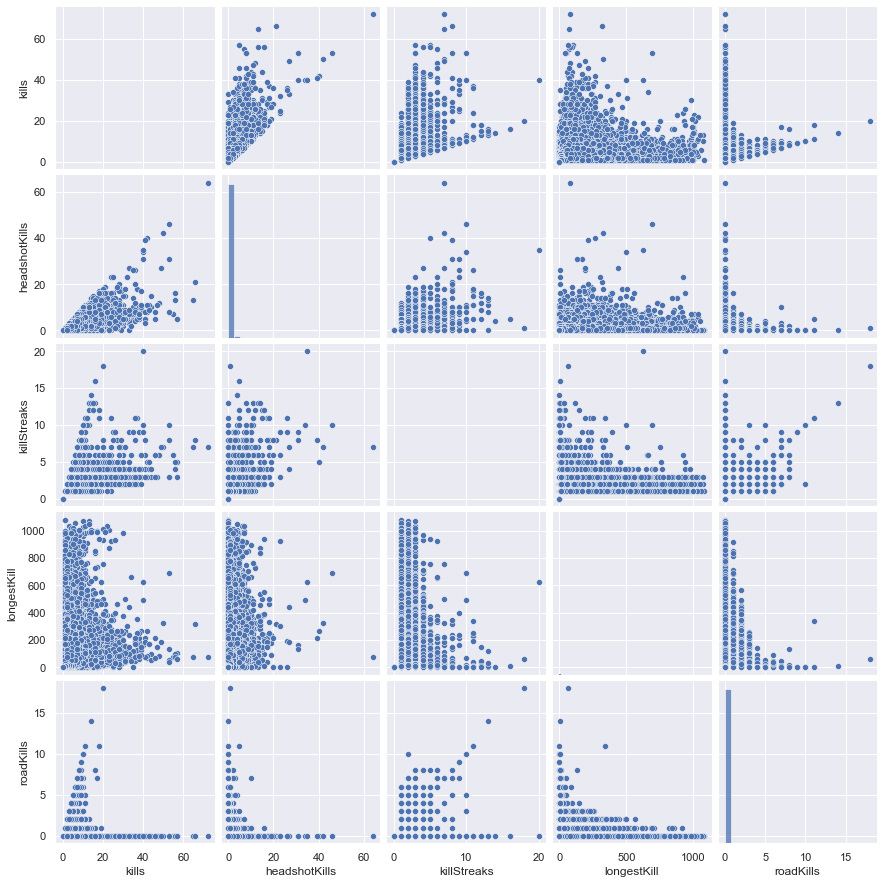

In [ ]:
# pairplot 그려보기

sns.set()
cols = ['kills', 'headshotKills', 'killStreaks', 'longestKill', 'roadKills']
sns.pairplot(df[cols], size = 2.5)
plt.show()

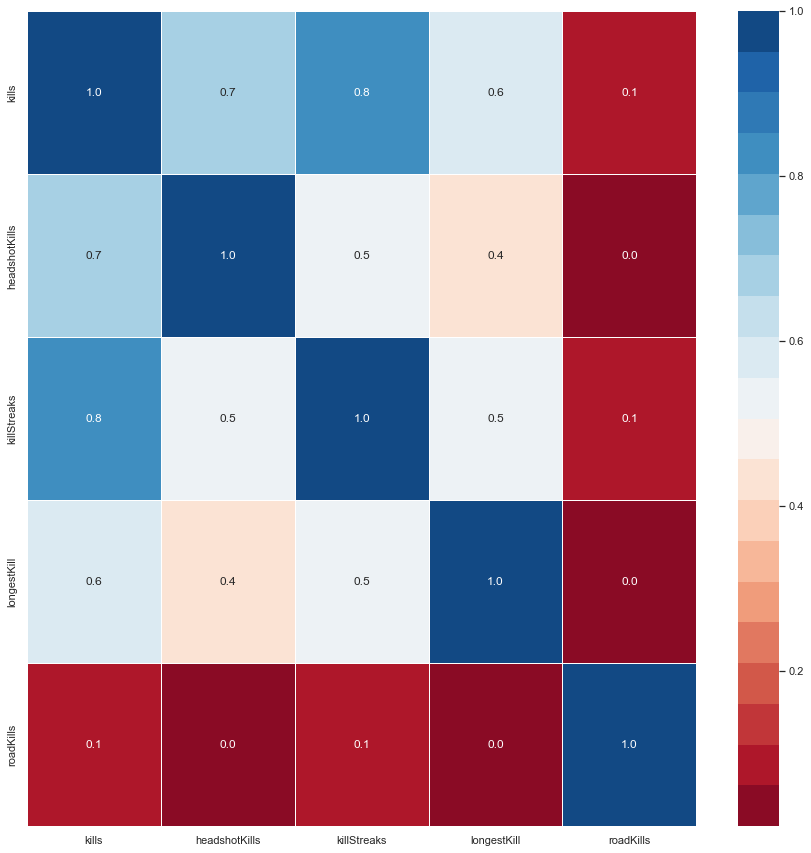

In [ ]:
# 숫자로 상관관계를 알아보기 위해서 heatmap 그려보기

f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_p.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("RdBu", 20))

plt.show()

### kills

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kills', ylabel='count'>

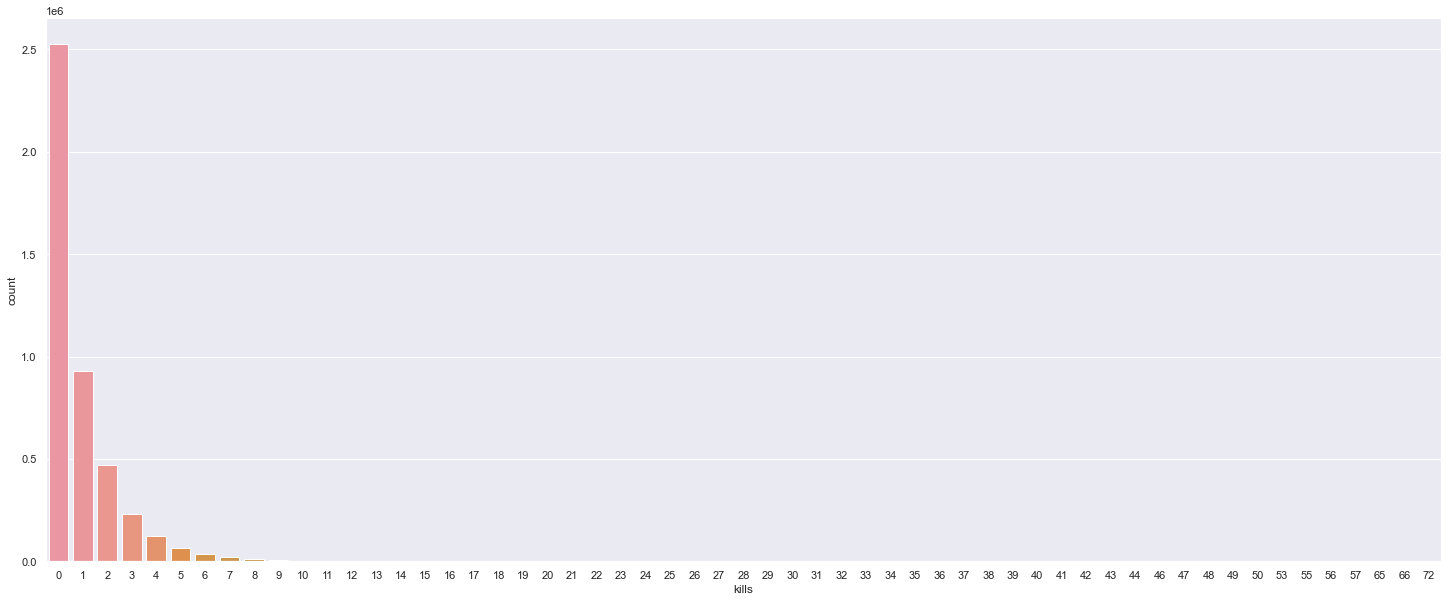

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df['kills'])

In [ ]:
df['kills'].value_counts()

0     2528805
1      927383
2      471752
3      231715
4      123708
5       65341
6       36232
7       19529
8       10436
9        5448
10       2744
11       1513
12        798
13        492
14        300
15        188
16        141
17        117
18         78
20         66
19         65
22         53
21         47
23         35
24         29
28         20
25         19
27         18
26         18
31         10
29         10
30         10
33          9
36          8
38          6
35          6
37          4
34          4
53          4
41          4
39          4
32          4
42          3
40          3
56          2
46          2
57          2
44          2
43          2
49          1
47          1
48          1
50          1
66          1
55          1
65          1
72          1
Name: kills, dtype: int64

In [ ]:
# 상위 1% data들 확인
df['kills'].loc[df['kills'] > df['kills'].quantile(0.99)].value_counts()

7     19529
8     10436
9      5448
10     2744
11     1513
12      798
13      492
14      300
15      188
16      141
17      117
18       78
20       66
19       65
22       53
21       47
23       35
24       29
28       20
25       19
26       18
27       18
29       10
30       10
31       10
33        9
36        8
35        6
38        6
39        4
53        4
32        4
41        4
34        4
37        4
40        3
42        3
44        2
46        2
56        2
57        2
43        2
47        1
49        1
48        1
50        1
66        1
55        1
65        1
72        1
Name: kills, dtype: int64

In [ ]:
print(f"한 명도 죽이지 않은 사람의 비율 : {len(df[df['kills']==0])/len(df['kills']):.2f}")
print(f"한 명도 죽이지 않은 사람과 한 명 죽인 사람의 비율 : {len(df[(df['kills']==0)|(df['kills']==1)])/len(df['kills']):.2f}")

한 명도 죽이지 않은 사람의 비율 : 0.57
한 명도 죽이지 않은 사람과 한 명 죽인 사람의 비율 : 0.78


In [ ]:
# 혼자서 72kill을 했다는 것이 가능한 것인지 의문이 생겨서 따로 알아봄
df['headshotKills'][df['kills']==72]

3431247    64
Name: headshotKills, dtype: int8

In [ ]:
# 혼자서 72kill을 한 데이터는 matchType이 normal-squad
df['matchType'][df['kills']==72]

3431247    normal-squad
Name: matchType, dtype: object

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


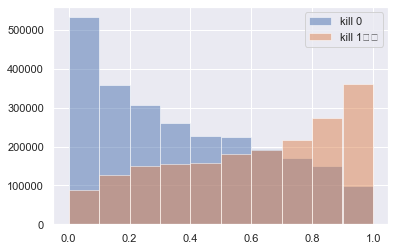

In [ ]:
# kill이 0인 데이터와 kill이 1이상인 데이터들이 어떤 분포를 하고 있는지 알아봄
plt.hist(df[df['kills']==0]['winPlacePerc'], label = 'kill 0', alpha=0.5)
plt.hist(df[df['kills']!=0]['winPlacePerc'], label = 'kill 1이상', alpha=0.5)
plt.legend()

In [ ]:
# winPlacePerc가 1이면서 kills가 0인 데이터가 16666만큼 존재함
df[(df['winPlacePerc']==1)&(df['kills']==0)]

Id         groupId         matchId  assists  boosts  \
107      7970b4ea89e81e  abf9e2780b9f48  04832cfd74ff30        1       1   
118      953577684b828a  54ce33c41ef9ff  c5d412db6dbee4        2       6   
493      575f5ad18b60ac  9ed86c84df9fe7  728a56582842f8        1       3   
1225     c1bda1f071fbc4  55fe3f03feaa0e  f8927d87063fd3        1       3   
1289     e825b1eab36bcc  6ad3351953b514  44fa051734f50f        2       2   
...                 ...             ...             ...      ...     ...   
4445253  3873f08567facd  1969e6ef7fc84a  0070e0d3a110ab        1       3   
4445751  32d65105ac0585  15ce3114dbd9a3  bf63c9506132d0        1       3   
4446093  2f57d1e882cc06  1c59e2133a2fbd  0027b1ffb2e346        0       0   
4446823  714a054acf8227  5c2f2875e3f74b  b68a152e9ed994        0       3   
4446831  dcf22ad3ced424  2bd9f39244ce44  4ff3bccdadd120        0       5   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
107        58.375000      0              0      2         38           0   
118        76.125000      0              0     12         45           0   
493       276.000000      0              0      2         44           0   
1225        3.669922      0              0      3         36        1019   
1289      126.812500      0              0      1         44        1337   
...              ...    ...            ...    ...        ...         ...   
4445253   125.625000      1              0      4         43        1509   
4445751   124.687500      0              0      0         40           0   
4446093   116.812500      0              0      0          3           0   
4446823    49.500000      0              0      0         45        1639   
4446831   208.750000      1              0      3         35           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
107          0            0          0.0           1708      squad        26   
118          0            0          0.0           1388    duo-fpp        49   
493          0            0          0.0           1828  squad-fpp        29   
1225         0            0          0.0           1817  squad-fpp        27   
1289         0            0          0.0           1392        duo        47   
...        ...          ...          ...            ...        ...       ...   
4445253      0            0          0.0           1362  squad-fpp        28   
4445751      0            0          0.0           1464        duo        46   
4446093      0            0          0.0           1808       solo        17   
4446823      0            0          0.0           1352  squad-fpp        27   
4446831      0            0          0.0           1883  squad-fpp        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
107             25        1494        0        5136.0          0   
118             47        1468        1           0.0          0   
493             26        1500        0        2292.0          0   
1225            25          -1        0        1298.0          0   
1289            47          -1        0           0.0          0   
...            ...         ...      ...           ...        ...   
4445253         26          -1        0         807.0          0   
4445751         46        1433        0           0.0          0   
4446093          2        1500        0           0.0          0   
4446823         26          -1        0           0.0          0   
4446831         23        1440        0        3812.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
107             0.000          0                0        2708.0   
118             0.000          0                0        2636.0   
493             0.000          0                0        2536.0   
1225            0.000          0                0        1751.0   
1289            0.000          0                0        1458.0   
...            

### headshotKills

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='headshotKills', ylabel='count'>

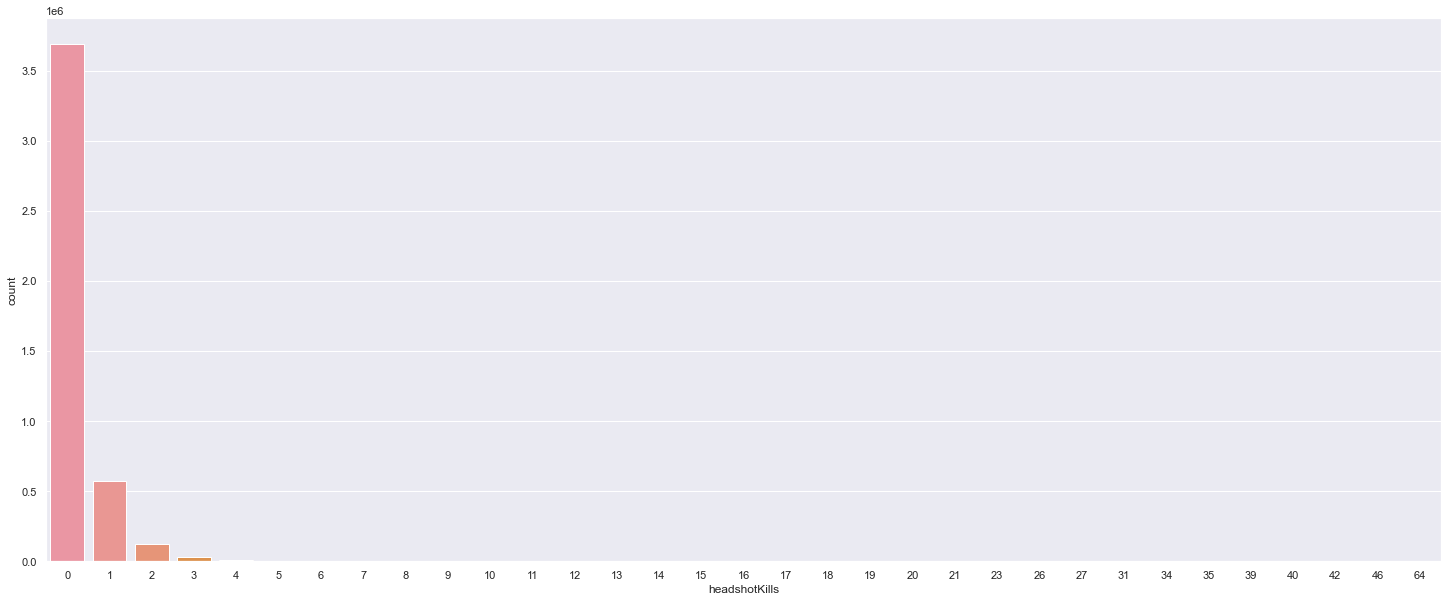

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df['headshotKills'])

In [ ]:
print(f"한 명도 헤드샷 시키지 않은 사람의 비율 : {len(df[df['headshotKills']==0])/len(df['headshotKills']):.2f}")
print(f"한 명도 헤드샷 시키지 않은 사람과 한 명 헤드샷 시킨 사람의 비율 : {len(df[(df['headshotKills']==0)|(df['headshotKills']==1)])/len(df['headshotKills']):.2f}")

한 명도 헤드샷 시키지 않은 사람의 비율 : 0.83
한 명도 헤드샷 시키지 않은 사람과 한 명 헤드샷 시킨 사람의 비율 : 0.96


In [ ]:
df['headshotKills'].value_counts()

0     3692025
1      570264
2      122210
3       30031
4        8254
5        2639
6         894
7         400
8         195
9          96
10         48
11         39
12         23
14         15
13         13
16         10
15          9
18          5
17          5
19          3
23          3
27          2
31          2
20          2
26          2
40          1
21          1
42          1
46          1
39          1
34          1
64          1
35          1
Name: headshotKills, dtype: int64

In [ ]:
# 상위 1% data들 확인
df['headshotKills'].loc[df['headshotKills'] > df['headshotKills'].quantile(0.99)].value_counts()

3     30031
4      8254
5      2639
6       894
7       400
8       195
9        96
10       48
11       39
12       23
14       15
13       13
16       10
15        9
18        5
17        5
19        3
23        3
31        2
20        2
26        2
27        2
42        1
21        1
46        1
39        1
34        1
40        1
64        1
35        1
Name: headshotKills, dtype: int64

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


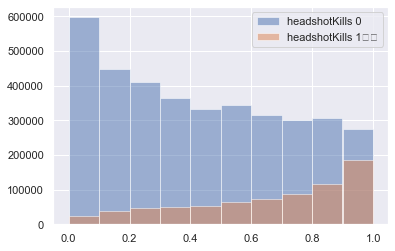

In [ ]:
# headshotKills가 0인 데이터와 1인 데이터를 비교
plt.hist(df[df['headshotKills']==0]['winPlacePerc'], label = 'headshotKills 0', alpha=0.5)
plt.hist(df[df['headshotKills']!=0]['winPlacePerc'], label = 'headshotKills 1이상', alpha=0.5)
plt.legend()

### killStreaks
- 연속해서 한 명도 죽이지 않은 것은 kill==0인 것과 같음

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='killStreaks', ylabel='count'>

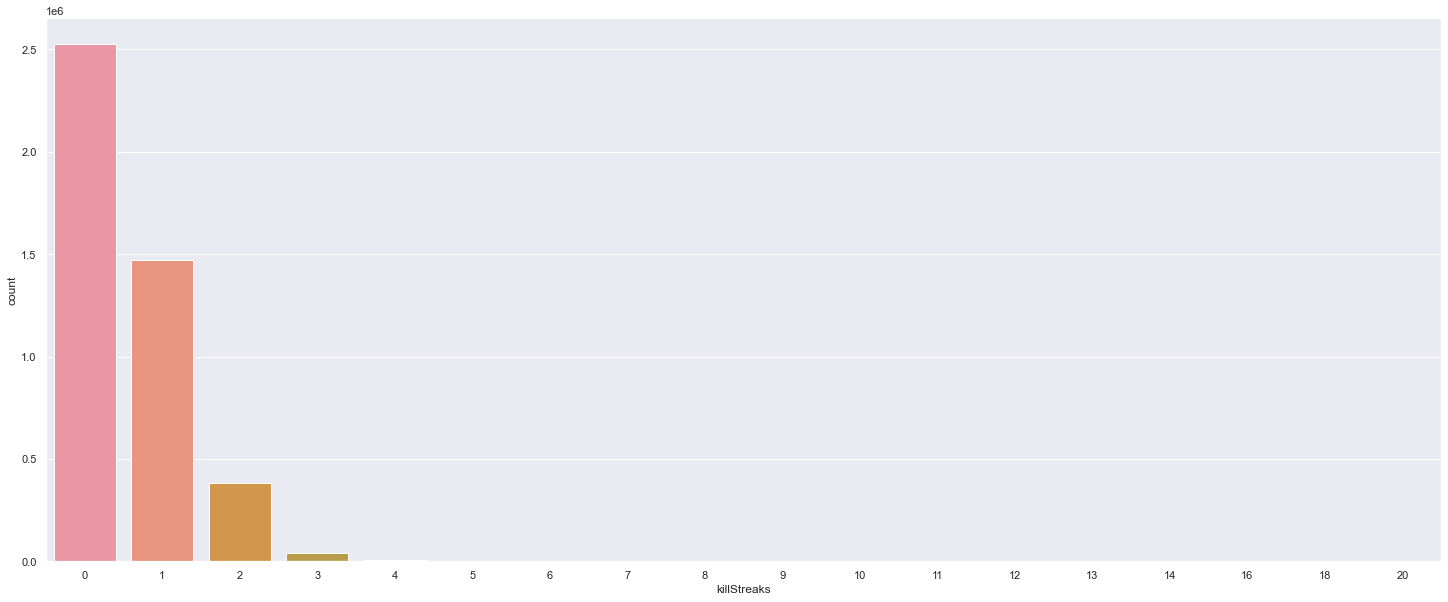

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df['killStreaks'])

In [ ]:
df['killStreaks'].value_counts()

0     2528805
1     1472203
2      380442
3       40661
4        4521
5         338
6         107
7          43
8          31
9          16
10          8
11          8
12          5
13          5
18          1
14          1
16          1
20          1
Name: killStreaks, dtype: int64

In [ ]:
print(f"일정한 시간 동안에 죽인 적의 수가 0인 사람의 비율 : {len(df[df['killStreaks']==0])/len(df['killStreaks']):.2f}")
print(f"일정한 시간 동안에 죽인 적의 수가 0인 사람과 1인 사람의 비율 : {len(df[(df['killStreaks']==0)|(df['killStreaks']==1)])/len(df['killStreaks']):.2f}")

일정한 시간 동안에 죽인 적의 수가 0인 사람의 비율 : 0.57
일정한 시간 동안에 죽인 적의 수가 0인 사람과 1인 사람의 비율 : 0.90


In [ ]:
# 상위 1% data 받아오기
df['killStreaks'].loc[df['killStreaks'] > df['killStreaks'].quantile(0.99)].value_counts()

4     4521
5      338
6      107
7       43
8       31
9       16
10       8
11       8
12       5
13       5
14       1
16       1
18       1
20       1
Name: killStreaks, dtype: int64

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


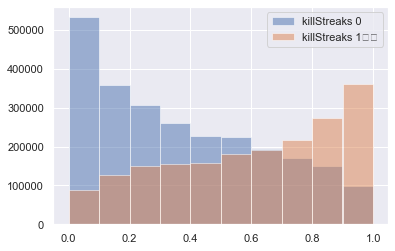

In [ ]:
# killStreaks 0인 데이터와 killStreaks 1인 데이터의 비교
plt.hist(df[df['killStreaks']==0]['winPlacePerc'], label = 'killStreaks 0', alpha=0.5)
plt.hist(df[df['killStreaks']!=0]['winPlacePerc'], label = 'killStreaks 1이상', alpha=0.5)
plt.legend()

### longestKill

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longestKill', ylabel='Density'>

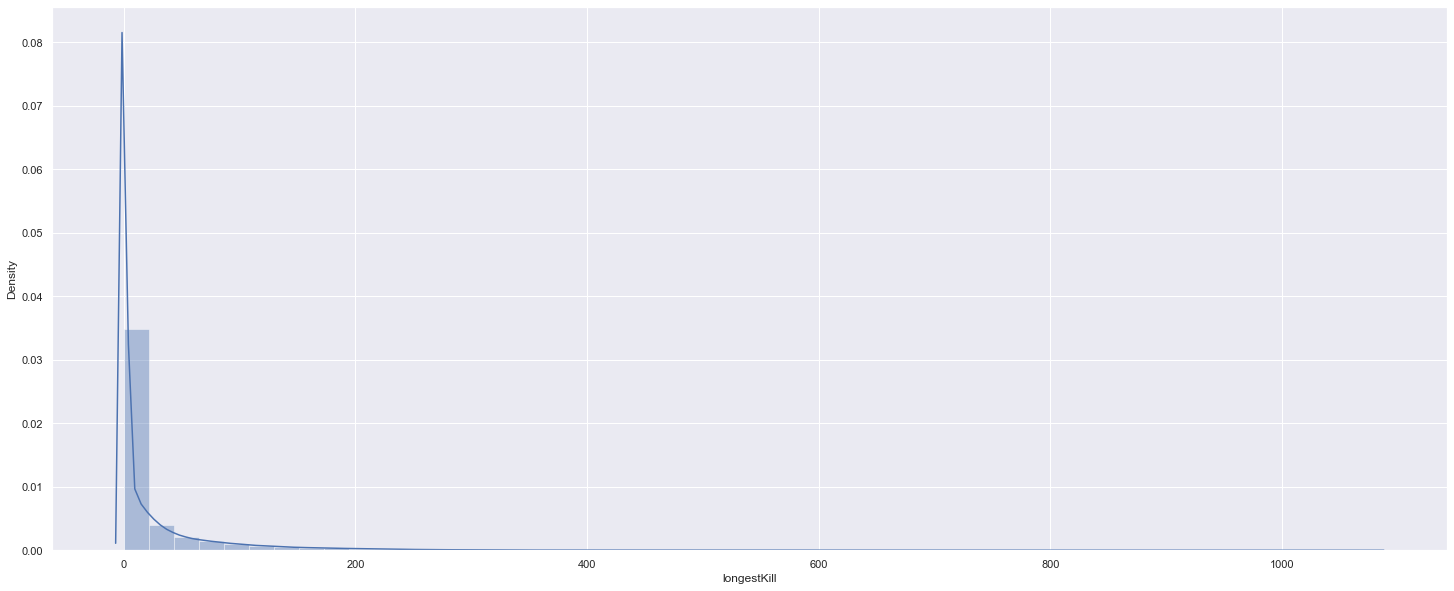

In [ ]:
plt.figure(figsize=(25,10))
sns.distplot(df['longestKill'])

In [ ]:
df[df['longestKill']>1000]

Id         groupId         matchId  assists  boosts  \
324313   ef390c152bcc3d  30fd444be3bbc1  4f7f8d6cf558b4        2       0   
523088   1ff9763ca30279  7fb3a83ebb050d  838cb9a3c94598        0       0   
803632   4e7e6c74e3c57d  94698690918933  da91b0c3d875f8        0       0   
996713   f4082eee4c45e9  4d02ce950f74fc  838cb9a3c94598        1       0   
1172437  303a93cfa1f46c  8795d39fd0df86  9c8962b58bb3e3        2       1   
1209416  528659ff1c1aec  7d1ba83423551d  ea9386587d5888        0       6   
1642712  91966848e08e2f  0ee4fbd27657c9  17dea22cefe62a        3       2   
2015559  5ff0c1a9fab2ba  2d8119b1544f87  904cecf36217df        3       3   
2122128  42df3102cb540b  7d9b2be15b355b  610d78f3affd2e        5       0   
2152425  4b9f61bac5eb0a  bc717b964f3bbe  838cb9a3c94598        3       0   
2592718  24e0fec84c18e9  8404855ca02e48  e886a8ebb702cf        7       0   
2981715  7f77051c7cef52  d6579a630399b5  4784f7d9a06b51        3       5   
3081503  f19a76e8d7ac52  624d65c529f87c  de19b70121c40f        3       0   
3255171  5524c154448425  674195558ad41b  db6f6d1f0d4904        1       0   
3304284  d0c286ce498e17  17fdd45e612bab  3eaaa2f7a360fe        7       0   
3320960  0040e53dfe7b5d  650661c2351eb7  2daabf3a7852e6        0       0   
3552532  db638834c62f6f  0614b611d6a935  ff80300f8262f5        2       0   
3772276  ba51dd0a1611c0  0614b611d6a935  ff80300f8262f5        2       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
324313       1028.00      0              0      0          9           0   
523088        151.25      0              0      0         45           0   
803632        196.75      0              0      0         51           0   
996713        916.50      0              0      0         17           0   
1172437       329.25      0              0      2         45        1000   
1209416      1640.00      0              7      0          1        1000   
1642712      2104.00      0              4     11         11           0   
2015559      1302.00      0              6      5         15           0   
2122128      2500.00      0              7      1          2           0   
2152425       945.50      0              0      0         11           0   
2592718      1684.00      0              4      7         11        1000   
2981715      1025.00      5              2      5          2           0   
3081503      1038.00      0              0      0         32        1000   
3255171      1355.00      0              2      0          9           0   
3304284      2330.00      0              2      0          2           0   
3320960       399.00      2              0      6         14        1000   
3552532       517.00      0              0      0         10           0   
3772276       460.25      0              1      0          3           0   

         kills  killStreaks  longestKill  matchDuration         matchType  \
324313      10            2       1026.0            698  normal-squad-fpp   
523088       1            1       1081.0           1195  normal-squad-fpp   
803632       1            1       1075.0            471  normal-squad-fpp   
996713      10            2       1072.0           1195  normal-squad-fpp   
1172437      3            1       1037.0            581  normal-squad-fpp   
1209416     15            2       1001.0           1235              solo   
1642712     23            2       1005.0           1798    normal-duo-fpp   
2015559     11            2       1037.0           1794  normal-squad-fpp   
2122128     22            3       1033.0           1798  normal-squad-fpp   
2152425     13            3       1071.0           1195  normal-squad-fpp   
2592718     13            2       1052.0           1792       normal-solo   
2981715      6            2       1003.0           1358               duo   
3081503      6            1       1059.0            661  normal-squad-fpp   
3255171     14            2       1002.0            8

In [ ]:
# 상위 1% data  보기
df['longestKill'].loc[df['longestKill'] > df['longestKill'].quantile(0.99)].value_counts()

258.0    158
259.5    155
260.0    152
265.0    150
267.5    149
        ... 
939.5      1
726.5      1
916.0      1
765.5      1
666.0      1
Name: longestKill, Length: 1681, dtype: int64

### roadKills

In [ ]:
df['roadKills'].value_counts()

0     4414421
1       11063
2        1272
3         291
4          70
5          36
6          20
7           9
8           7
9           2
11          2
10          2
14          1
18          1
Name: roadKills, dtype: int64

In [ ]:
# roadKills는 0인 사람이 대다수
print(f"이동수단 안에서 사람을 사람을 죽인 적이 없는 사람의 비율 : {len(df[df['roadKills']==0])/len(df['roadKills']):.4f}")

이동수단 안에서 사람을 사람을 죽인 적이 없는 사람의 비율 : 0.9971


#### 2. Normal 제외한 데이터
- 담당 column : kills, headshotKills, killStreaks, longestKill, roadKills

In [ ]:
# normal이 아닌 데이터만을 확인
df_p = df[['groupId','matchId','kills', 'headshotKills', 'killStreaks', 'longestKill', 'roadKills']][df['isnormal']==0]
df_p

groupId         matchId  kills  headshotKills  killStreaks  \
0        4d4b580de459be  a10357fd1a4a91      0              0            0   
1        684d5656442f9e  aeb375fc57110c      0              0            0   
2        6a4a42c3245a74  110163d8bb94ae      0              0            0   
3        a930a9c79cd721  f1f1f4ef412d7e      0              0            0   
4        de04010b3458dd  6dc8ff871e21e6      1              0            1   
...                 ...             ...    ...            ...          ...   
4446961  d238e426f50de7  18492834ce5635      0              0            0   
4446962  408cdb5c46b2ac  ee854b837376d9      0              0            0   
4446963  e26ac84bdf7cef  6d0cd12784f1ab      0              0            0   
4446964  c2223f35411394  c9c701d0ad758a      2              1            1   
4446965  8c74f72fedf5ff  62a16aabcc095c      2              0            1   

         longestKill  roadKills  
0            0.00000          0  
1            0.00000          0  
2            0.00000          0  
3            0.00000          0  
4           58.53125          0  
...              ...        ...  
4446961      0.00000          0  
4446962      0.00000          0  
4446963      0.00000          0  
4446964     98.50000          0  
4446965     78.25000          0  

[4403216 rows x 7 columns]

In [ ]:
df_p.info(verbose=True, null_counts=True)

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1355/1601698014.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_p.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4403216 entries, 0 to 4446965
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   groupId        4403216 non-null  object 
 1   matchId        4403216 non-null  object 
 2   kills          4403216 non-null  int8   
 3   headshotKills  4403216 non-null  int8   
 4   killStreaks    4403216 non-null  int8   
 5   longestKill    4403216 non-null  float16
 6   roadKills      4403216 non-null  int8   
dtypes: float16(1), int8(4), object(2)
memory usage: 126.0+ MB


In [ ]:
df_p.describe()

kills  headshotKills   killStreaks  longestKill     roadKills
count  4.403216e+06   4.403216e+06  4.403216e+06  4403216.000  4.403216e+06
mean   8.838706e-01   2.152375e-01  5.349942e-01          NaN  3.438623e-03
std    1.420673e+00   5.557929e-01  6.993746e-01          NaN  7.271354e-02
min    0.000000e+00   0.000000e+00  0.000000e+00        0.000  0.000000e+00
25%    0.000000e+00   0.000000e+00  0.000000e+00        0.000  0.000000e+00
50%    0.000000e+00   0.000000e+00  0.000000e+00        0.000  0.000000e+00
75%    1.000000e+00   0.000000e+00  1.000000e+00       20.625  0.000000e+00
max    2.300000e+01   1.900000e+01  1.800000e+01     1003.000  1.800000e+01

In [ ]:
df_normal = df[df['isnormal']==0]
df_normal

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0            0.00000      0              0      0         60        1241   
1           91.50000      0              0      0         57           0   
2           68.00000      0              0      0         47           0   
3           32.90625      0              0      0         75           0   
4          100.00000      0              0      0         45           0   
...              ...    ...            ...    ...        ...         ...   
4446961      0.00000      0              0      0         74        1029   
4446962     44.15625      0              0      0         69           0   
4446963     59.06250      0              0      0         66           0   
4446964    180.37500      1              1      2         11           0   
4446965    268.00000      0              0      1         18           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0            0            0      0.00000           1306  squad-fpp        28   
1            0            0      0.00000           1777  squad-fpp        26   
2            0            0      0.00000           1318        duo        50   
3            0            0      0.00000           1436  squad-fpp        31   
4            1            1     58.53125           1424   solo-fpp        97   
...        ...          ...          ...            ...        ...       ...   
4446961      0            0      0.00000           1873  squad-fpp        29   
4446962      0            0      0.00000           1435       solo        93   
4446963      0            0      0.00000           1321  squad-fpp        28   
4446964      2            1     98.50000           1373  squad-fpp        26   
4446965      2            1     78.25000           1766   solo-fpp        98   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
0               26          -1        0      0.000000          0   
1               25        1484        0      0.004501          0   
2               47        1491        0      0.000000          0   
3               30        1408        0      0.000000          0   
4               95        1560        0      0.000000          0   
...            ...         ...      ...           ...        ...   
4446961         28          -1        0   1292.000000          0   
4446962         93        1501        0      0.000000          0   
4446963         28        1500        0      0.000000          0   
4446964         25        1418        2      0.000000          0   
4446965         94        1590        0   1369.000000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0            0.000000          0                0      244.7500   
1           11.039062          0                0     1434.0000   
2            0.000000          0                0      161.7500   
3            0.000000          0                0      202.7500   
4            0.000000          0                0       49.7500   
...            

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


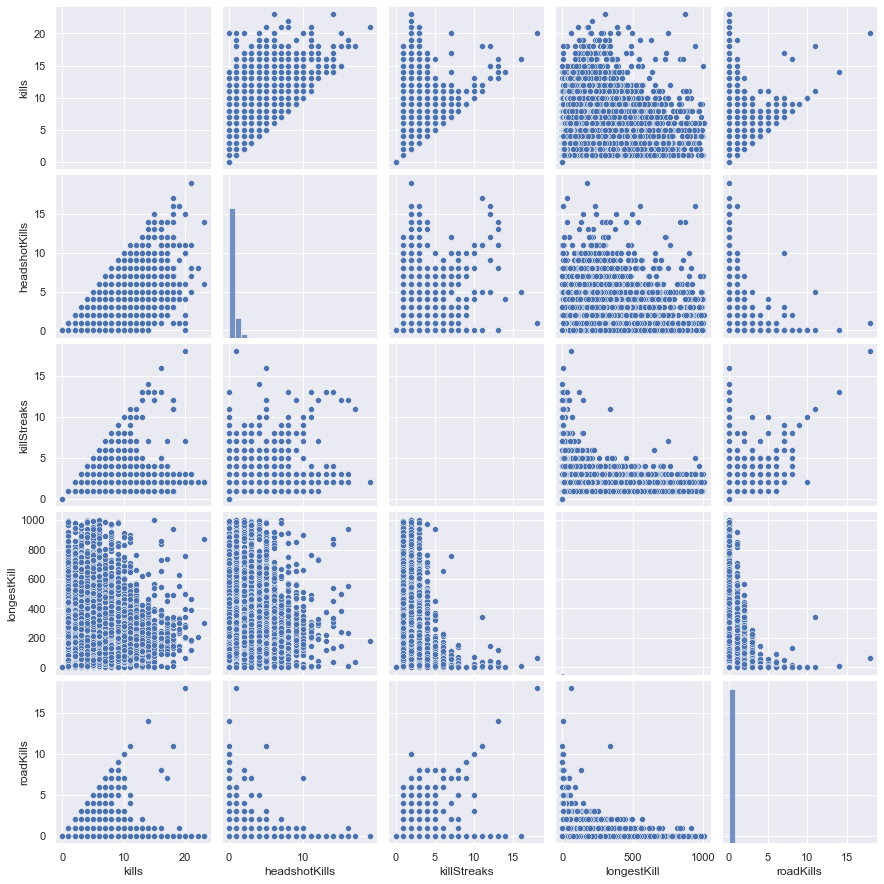

In [ ]:
# pairplot 그려보기

sns.set()
cols = ['kills', 'headshotKills', 'killStreaks', 'longestKill', 'roadKills']
sns.pairplot(df[df['isnormal']==0][cols], size = 2.5)
plt.show()

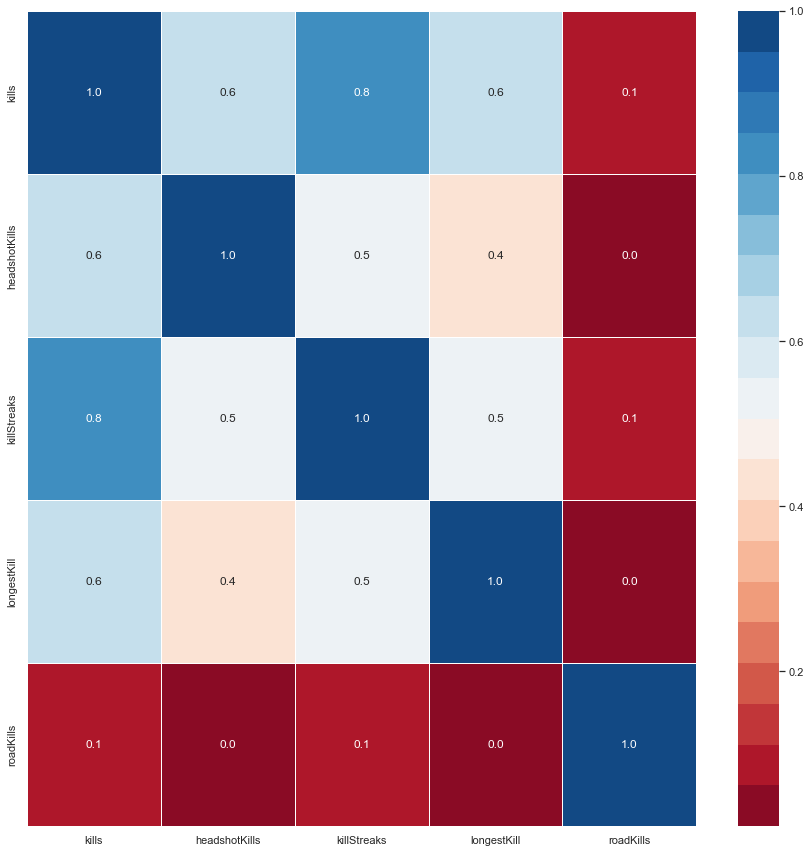

In [ ]:
# 숫자로 상관관계를 알아보기 위해서 heatmap 그려보기

f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_p.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("RdBu", 20))

plt.show()

### kills

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kills', ylabel='count'>

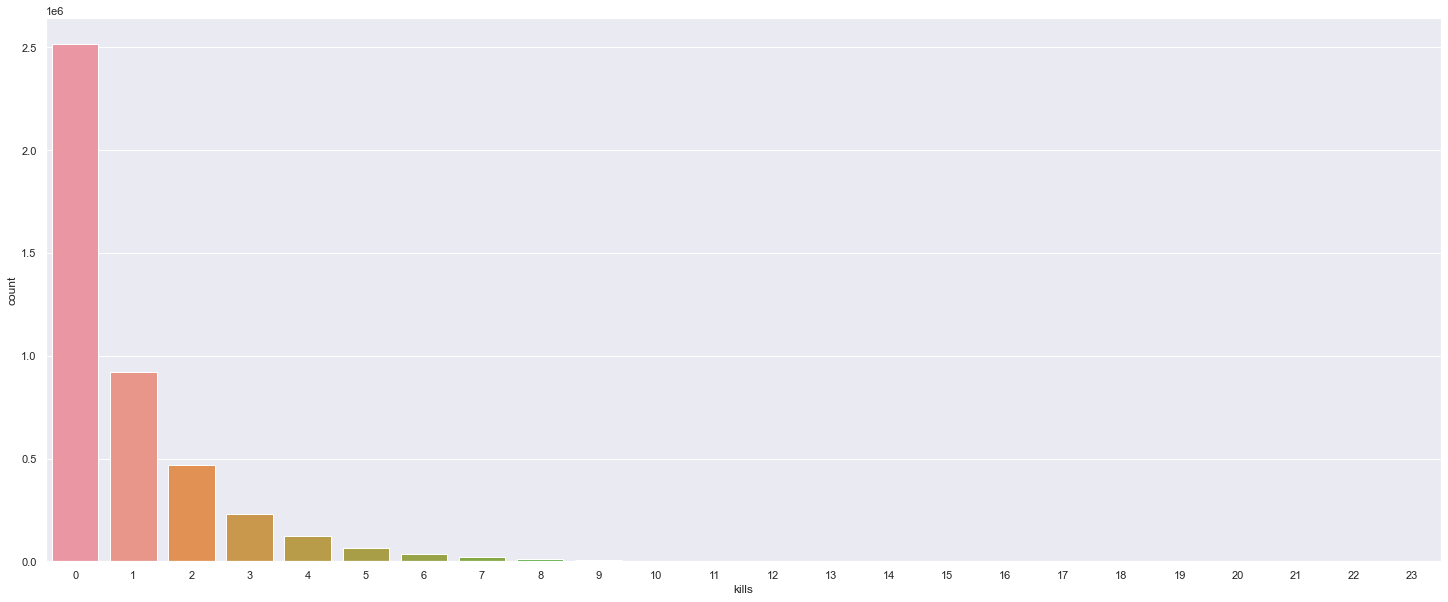

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df['kills'][df['isnormal']==0])

In [ ]:
df['kills'][df['isnormal']==0].value_counts() # 33초과의 큰 숫자는 사라짐

0     2518835
1      923344
2      469335
3      230044
4      122596
5       64458
6       35530
7       19019
8        9975
9        5107
10       2450
11       1266
12        606
13        314
14        152
15         69
16         43
17         26
18         19
19         11
20          9
21          5
23          2
22          1
Name: kills, dtype: int64

In [ ]:
print(f"한 명도 죽이지 않은 사람의 비율 : {len(df[(df['kills']==0)&(df['isnormal']==0)])/len(df['isnormal']==0):.2f}")
print(f"한 명도 죽이지 않은 사람과 한 명 죽인 사람의 비율 : {len(df[(df['kills']==0)|(df['kills']==1)&(df['isnormal']==0)])/len(df['kills']):.2f}")
# 비율 상으로는 차이 x

한 명도 죽이지 않은 사람의 비율 : 0.57
한 명도 죽이지 않은 사람과 한 명 죽인 사람의 비율 : 0.78


In [ ]:
# normal을 다 제거한 후 kill 수가 가장 많은 사람 데이터
df_normal[df_normal['kills']==33]

Empty DataFrame
Columns: [Id, groupId, matchId, assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, killPoints, kills, killStreaks, longestKill, matchDuration, matchType, maxPlace, numGroups, rankPoints, revives, rideDistance, roadKills, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints, winPlacePerc, isnormal]
Index: []

In [ ]:
df_normal[df_normal['groupId']=='7de402ea23a8ef']

Id         groupId         matchId  assists  boosts  \
1525264  9af1e014b50230  7de402ea23a8ef  59e23ee8543fd2        1       9   
3669907  19a96f0169f6c8  7de402ea23a8ef  59e23ee8543fd2        3       6   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
1525264        760.0      3              2      4          3        1548   
3669907        386.5      2              3      8          2        1167   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
1525264      3            1     51.84375           1961     squad        27   
3669907      4            1     85.93750           1961     squad        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
1525264         25          -1        1        4348.0          0   
3669907         25          -1        3        4140.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
1525264     17.234375          0                0        2934.0   
3669907     21.265625          0                0        3380.0   

         weaponsAcquired  winPoints  winPlacePerc  isnormal  
1525264                7       1568           1.0         0  
3669907                4       1497           1.0         0

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


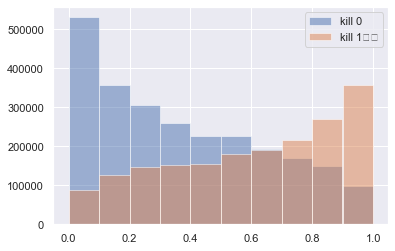

In [ ]:
plt.hist(df_normal[df_normal['kills']==0]['winPlacePerc'], label = 'kill 0', alpha=0.5)
plt.hist(df_normal[df_normal['kills']!=0]['winPlacePerc'], label = 'kill 1이상', alpha=0.5)
plt.legend()

In [ ]:
df_normal[(df_normal['winPlacePerc']==1)&(df_normal['kills']==0)] #16666 -> 16423

Id         groupId         matchId  assists  boosts  \
107      7970b4ea89e81e  abf9e2780b9f48  04832cfd74ff30        1       1   
118      953577684b828a  54ce33c41ef9ff  c5d412db6dbee4        2       6   
493      575f5ad18b60ac  9ed86c84df9fe7  728a56582842f8        1       3   
1225     c1bda1f071fbc4  55fe3f03feaa0e  f8927d87063fd3        1       3   
1289     e825b1eab36bcc  6ad3351953b514  44fa051734f50f        2       2   
...                 ...             ...             ...      ...     ...   
4445253  3873f08567facd  1969e6ef7fc84a  0070e0d3a110ab        1       3   
4445751  32d65105ac0585  15ce3114dbd9a3  bf63c9506132d0        1       3   
4446093  2f57d1e882cc06  1c59e2133a2fbd  0027b1ffb2e346        0       0   
4446823  714a054acf8227  5c2f2875e3f74b  b68a152e9ed994        0       3   
4446831  dcf22ad3ced424  2bd9f39244ce44  4ff3bccdadd120        0       5   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
107        58.375000      0              0      2         38           0   
118        76.125000      0              0     12         45           0   
493       276.000000      0              0      2         44           0   
1225        3.669922      0              0      3         36        1019   
1289      126.812500      0              0      1         44        1337   
...              ...    ...            ...    ...        ...         ...   
4445253   125.625000      1              0      4         43        1509   
4445751   124.687500      0              0      0         40           0   
4446093   116.812500      0              0      0          3           0   
4446823    49.500000      0              0      0         45        1639   
4446831   208.750000      1              0      3         35           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
107          0            0          0.0           1708      squad        26   
118          0            0          0.0           1388    duo-fpp        49   
493          0            0          0.0           1828  squad-fpp        29   
1225         0            0          0.0           1817  squad-fpp        27   
1289         0            0          0.0           1392        duo        47   
...        ...          ...          ...            ...        ...       ...   
4445253      0            0          0.0           1362  squad-fpp        28   
4445751      0            0          0.0           1464        duo        46   
4446093      0            0          0.0           1808       solo        17   
4446823      0            0          0.0           1352  squad-fpp        27   
4446831      0            0          0.0           1883  squad-fpp        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
107             25        1494        0        5136.0          0   
118             47        1468        1           0.0          0   
493             26        1500        0        2292.0          0   
1225            25          -1        0        1298.0          0   
1289            47          -1        0           0.0          0   
...            ...         ...      ...           ...        ...   
4445253         26          -1        0         807.0          0   
4445751         46        1433        0           0.0          0   
4446093          2        1500        0           0.0          0   
4446823         26          -1        0           0.0          0   
4446831         23        1440        0        3812.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
107             0.000          0                0        2708.0   
118             0.000          0                0        2636.0   
493             0.000          0                0        2536.0   
1225            0.000          0                0        1751.0   
1289            0.000          0                0        1458.0   
...            

### headshotKills

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='headshotKills', ylabel='count'>

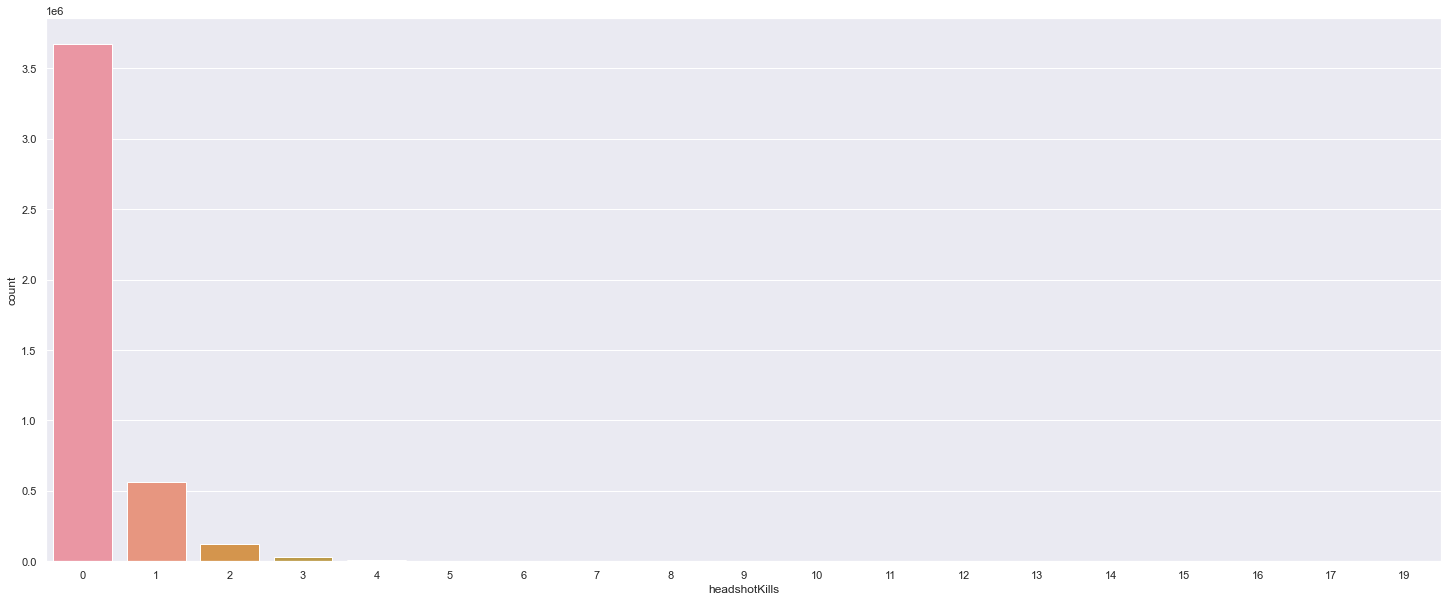

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df_normal['headshotKills'])

In [ ]:
print(f"한 명도 헤드샷 시키지 않은 사람의 비율 : {len(df_normal[df_normal['headshotKills']==0])/len(df_normal['headshotKills']):.2f}")
print(f"한 명도 헤드샷 시키지 않은 사람과 한 명 헤드샷 시킨 사람의 비율 : {len(df_normal[(df_normal['headshotKills']==0)|(df_normal['headshotKills']==1)])/len(df_normal['headshotKills']):.2f}")

한 명도 헤드샷 시키지 않은 사람의 비율 : 0.83
한 명도 헤드샷 시키지 않은 사람과 한 명 헤드샷 시킨 사람의 비율 : 0.96


In [ ]:
df_normal['headshotKills'].value_counts()  # 큰 값들이 꽤 많이 사라짐

0     3675513
1      566292
2      120612
3       29265
4        7804
5        2398
6         757
7         300
8         134
9          56
10         31
11         18
12         13
14          9
16          4
15          4
13          4
17          1
19          1
Name: headshotKills, dtype: int64

In [ ]:
df_normal[df_normal['headshotKills']==26]

Empty DataFrame
Columns: [Id, groupId, matchId, assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, killPoints, kills, killStreaks, longestKill, matchDuration, matchType, maxPlace, numGroups, rankPoints, revives, rideDistance, roadKills, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints, winPlacePerc, isnormal]
Index: []

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


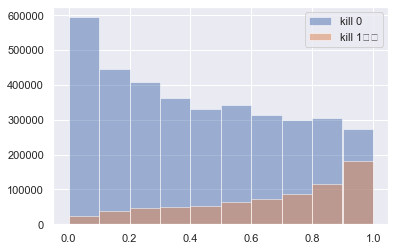

In [ ]:
plt.hist(df_normal[df_normal['headshotKills']==0]['winPlacePerc'], label = 'kill 0', alpha=0.5)
plt.hist(df_normal[df_normal['headshotKills']!=0]['winPlacePerc'], label = 'kill 1이상', alpha=0.5)
plt.legend()

### killStreaks

In [ ]:
df_normal['killStreaks'].value_counts() # 큰 값들이 조금 줄기는 했지만 엄청나게 큰 차이는 없는 듯하다.

0     2518835
1     1463237
2      376621
3       39762
4        4301
5         288
6          81
7          34
8          23
9          10
10          6
11          5
12          5
13          5
14          1
16          1
18          1
Name: killStreaks, dtype: int64

In [ ]:
print(f"일정한 시간 동안에 죽인 적의 수가 0인 사람의 비율 : {len(df_normal[df_normal['killStreaks']==0])/len(df_normal['killStreaks']):.2f}")
print(f"일정한 시간 동안에 죽인 적의 수가 0인 사람과 1인 사람의 비율 : {len(df_normal[(df_normal['killStreaks']==0)|(df_normal['killStreaks']==1)])/len(df_normal['killStreaks']):.2f}")

일정한 시간 동안에 죽인 적의 수가 0인 사람의 비율 : 0.57
일정한 시간 동안에 죽인 적의 수가 0인 사람과 1인 사람의 비율 : 0.90


/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='killStreaks', ylabel='count'>

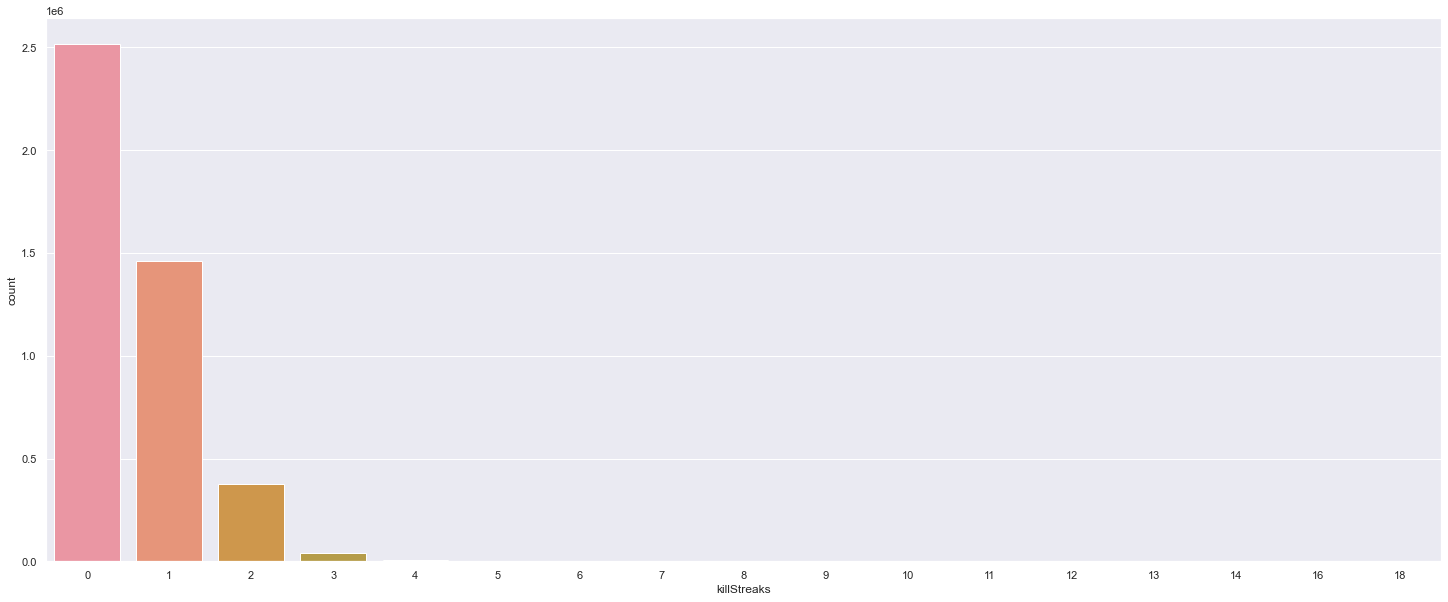

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df_normal['killStreaks'])

In [ ]:
df_normal[(df_normal['headshotKills']==df_normal['kills'])&df_normal['kills']>1]

Empty DataFrame
Columns: [Id, groupId, matchId, assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, killPoints, kills, killStreaks, longestKill, matchDuration, matchType, maxPlace, numGroups, rankPoints, revives, rideDistance, roadKills, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints, winPlacePerc, isnormal]
Index: []

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


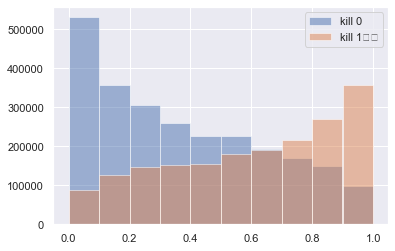

In [ ]:
plt.hist(df_normal[df_normal['killStreaks']==0]['winPlacePerc'], label = 'kill 0', alpha=0.5)
plt.hist(df_normal[df_normal['killStreaks']!=0]['winPlacePerc'], label = 'kill 1이상', alpha=0.5)
plt.legend()

### longestKill

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longestKill', ylabel='Density'>

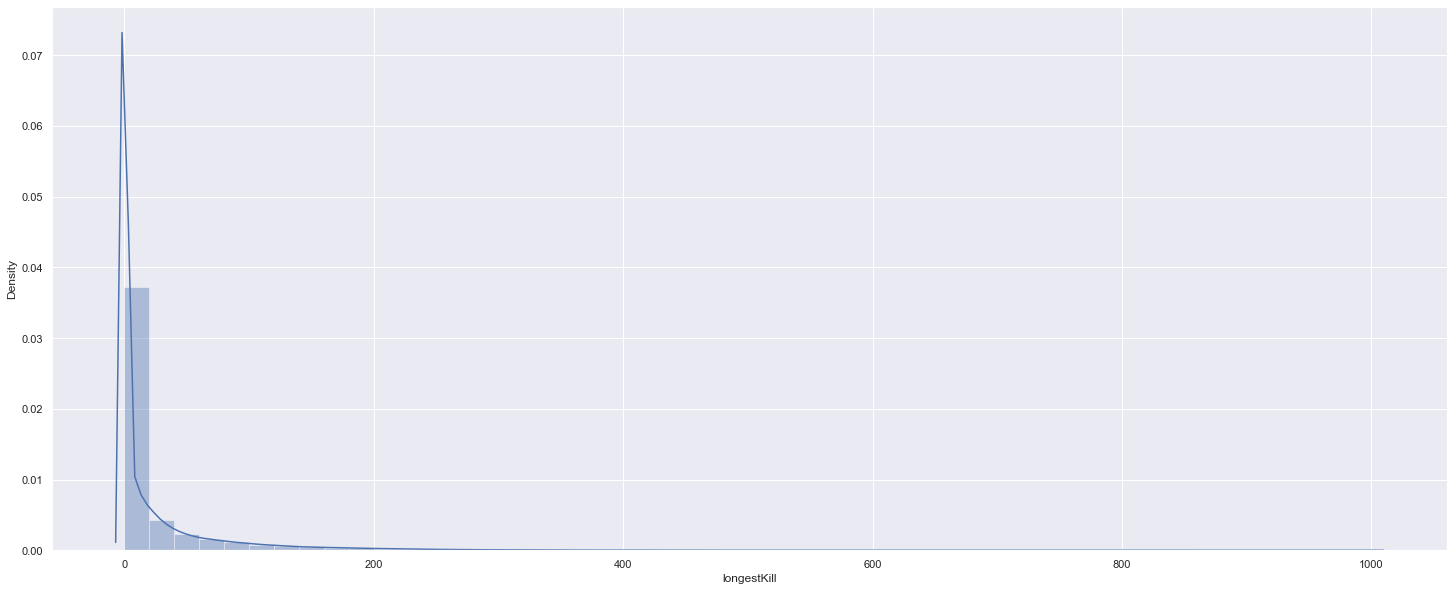

In [ ]:
plt.figure(figsize=(25,10))
sns.distplot(df_normal['longestKill'])

In [ ]:
df_normal[df_normal['longestKill']>1000] # 거리가 1000이상인 수가 21에서 2로 줄음

Id         groupId         matchId  assists  boosts  \
1209416  528659ff1c1aec  7d1ba83423551d  ea9386587d5888        0       6   
2981715  7f77051c7cef52  d6579a630399b5  4784f7d9a06b51        3       5   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
1209416       1640.0      0              7      0          1        1000   
2981715       1025.0      5              2      5          2           0   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
1209416     15            2       1001.0           1235      solo        52   
2981715      6            2       1003.0           1358       duo        47   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
1209416         51          -1        0           0.0          0   
2981715         44        1553        1           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
1209416        0.0000          0                0        2848.0   
2981715       87.9375          0                0        3998.0   

         weaponsAcquired  winPoints  winPlacePerc  isnormal  
1209416                4       1500      0.941406         0  
2981715                7          0      1.000000         0

### roadKills

In [ ]:
df_normal['roadKills'].value_counts() # 0이 아닌 숫자가 원래부터 적어서 그런지 차이가 없음

0     4390548
1       10970
2        1263
3         286
4          69
5          36
6          20
7           9
8           7
9           2
11          2
10          2
14          1
18          1
Name: roadKills, dtype: int64

In [ ]:
print(f"이동수단 안에서 사람을 사람을 죽인 적이 없는 사람의 비율 : {len(df_normal[df_normal['roadKills']==0])/len(df_normal['roadKills']):.4f}")

이동수단 안에서 사람을 사람을 죽인 적이 없는 사람의 비율 : 0.9971


### matchtype이 Normal인 경우, 아닌 경우의 분포
- 두 분포에 큰 차이가 보인다. Custom 게임은 상대적으로 참여한 인원 수가 적어서 Uniform이 더 고르게 나오지 않았다.
  
  또한, Duo 데이터도 많이 존재하는지 0, 1 막대가 크다.   

In [ ]:
def plot_hist(x, title):
    
    fig, ax = plt.subplots(figsize=(13,7))
    formatter = plt.FuncFormatter(lambda x, y: '{:,.2f}'.format(x))
    
    ax.yaxis.set_major_formatter(formatter=formatter)
    ax.xaxis.set_major_formatter(formatter=formatter)

    ax.set_title(title)
    sns.distplot(x, bins=50, kde=False, ax=ax)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


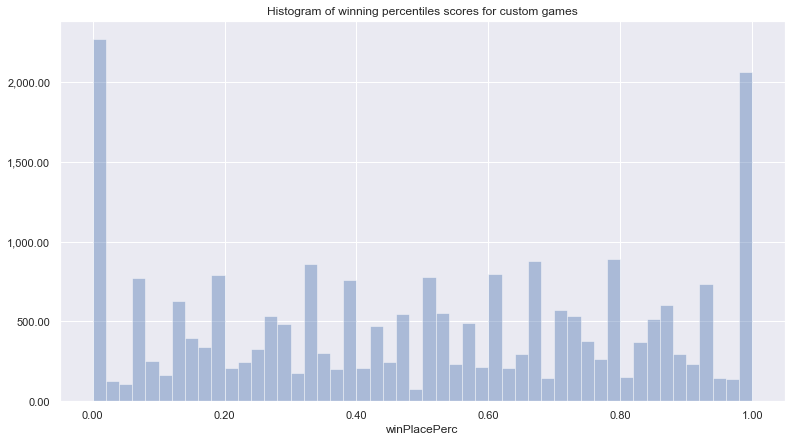

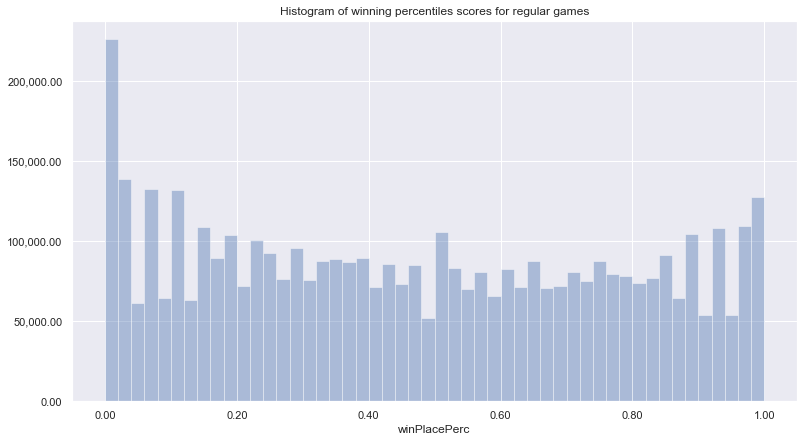

In [ ]:
plot_hist(df[df['isnormal'] != 0].winPlacePerc, title = 'Histogram of winning percentiles scores for custom games')
plot_hist(df[df['isnormal'] != 1].winPlacePerc, title = 'Histogram of winning percentiles scores for regular games')

### 안희수 - killPoints, rankPoints, winPoints, killPlace, maxPlace

##### 한 경기 참가자 수  <  1인 최대 킬수 drop 

In [ ]:
# 같은 게임에 참여한 사람 수 컬럼
df.loc[:,'num']=df.groupby('matchId')['Id'].transform('count')

# 한 게임에서 최대 킬 수 컬럼
df.loc[:,'max']=df.groupby('matchId')['kills'].transform('max')

df.loc[df['num']<=df['max'],['num','max']]

num  max
1292      32   38
2769       8   11
5479       8   17
6673      42   49
11892     21   25
...      ...  ...
4431091   15   16
4431589    7   30
4434989   16   26
4435441   14   16
4438715   13   17

[1825 rows x 2 columns]

In [ ]:
# 최대 킬수가 한 게임 사람 수 보다 많을 수 없음 -> 2124 case 확인 -> drop
df=df[df['num']>df['max']]
df = df.drop(['num','max'], axis =1)

#### maxPlace기준으로 numGroups 수정 필요

In [ ]:
# 한 팀에 팀원이 4명을 초과하는 팀 존재 
groupId_idx = df.loc[:,'groupId'].value_counts().to_frame()
groupId_idx[groupId_idx.groupId>4].value_counts()

groupId
5          53073
6          25701
7          14723
8           8348
9           4805
10          2911
11          1801
12          1131
13           813
14           560
15           344
16           227
17           154
18           112
19            61
20            22
22            17
21            16
23             7
26             5
24             3
25             2
27             2
28             2
31             1
36             1
49             1
64             1
72             1
74             1
dtype: int64

In [ ]:
# df.loc[df.groupId == '14d6b54cdec6bc','matchId'].value_counts() 
# matchId -> 'b30f3d87189aa6', matchType -> normal-squad-fpp
df.loc[df.matchId== 'b30f3d87189aa6','groupId'].value_counts()
# 2팀 밖에 없는데 팀 당 인원이 비정상적 

14d6b54cdec6bc    74
0aef53445f8793    14
Name: groupId, dtype: int64

In [ ]:
# df[df.groupId == 'b8275198faa03b'].head()
# matchId -> '3e029737889ce9', matchType -> duo-fpp	
df.loc[df.matchId== '3e029737889ce9','groupId'].value_counts()
# api 문제로 보임

b8275198faa03b    72
027acbdefaabeb     5
08377106391dc7     2
014d49e075248d     2
0b3fba262a4732     2
3d8cc0f335a2f0     2
cd04ba200d96f3     2
7f88776566d32c     2
c0c6410068769c     2
ab0b8f414d366c     2
ebae3dbb387bd2     2
f0a89af587b46e     2
76fcb3774711a9     1
515e10595b81ee     1
Name: groupId, dtype: int64

팀원 수가 정상이 아닌 이유

1. 커스텀 게임 - 대부분의 경우
2. api문제 : 두 팀을 한 그룹으로 묶어버림
3. 드문 확률로 한 팀이 5명 이상으로 플레이 - 버그

결론 : matchId는 오류가 많아서 열 삭제 필요, maxPlace, numGroup조정 필요

1. 참가 인원에 비해 팀 수가 너무 적은 경우
2. maxPlace와 numGroups가 너무 많이 차이나는 경우
-> 조정하는 코드는 machine_learning/src/feature/outlier_detection.py 확인

#### Points 분석

In [ ]:
# 파생 feature 생성
df['healthitems'] = df['heals'] + df['boosts']
df['totalDistance'] = df['rideDistance'] + df["walkDistance"] + df["swimDistance"]
df["skill"] = df["headshotKills"] + df["roadKills"]

In [ ]:
idx_nm = df[(df.killPoints>0)&(df.winPoints>0)]
idx_nm[['rankPoints','killPoints','winPoints']].describe()

rankPoints    killPoints     winPoints
count  1.782132e+06  1.782132e+06  1.782132e+06
mean  -9.500211e-01  1.252903e+03  1.505407e+03
std    2.179014e-01  1.963060e+02  6.863816e+01
min   -1.000000e+00  1.340000e+02  3.210000e+02
25%   -1.000000e+00  1.090000e+03  1.480000e+03
50%   -1.000000e+00  1.240000e+03  1.500000e+03
75%   -1.000000e+00  1.385000e+03  1.530000e+03
max    0.000000e+00  2.170000e+03  2.013000e+03

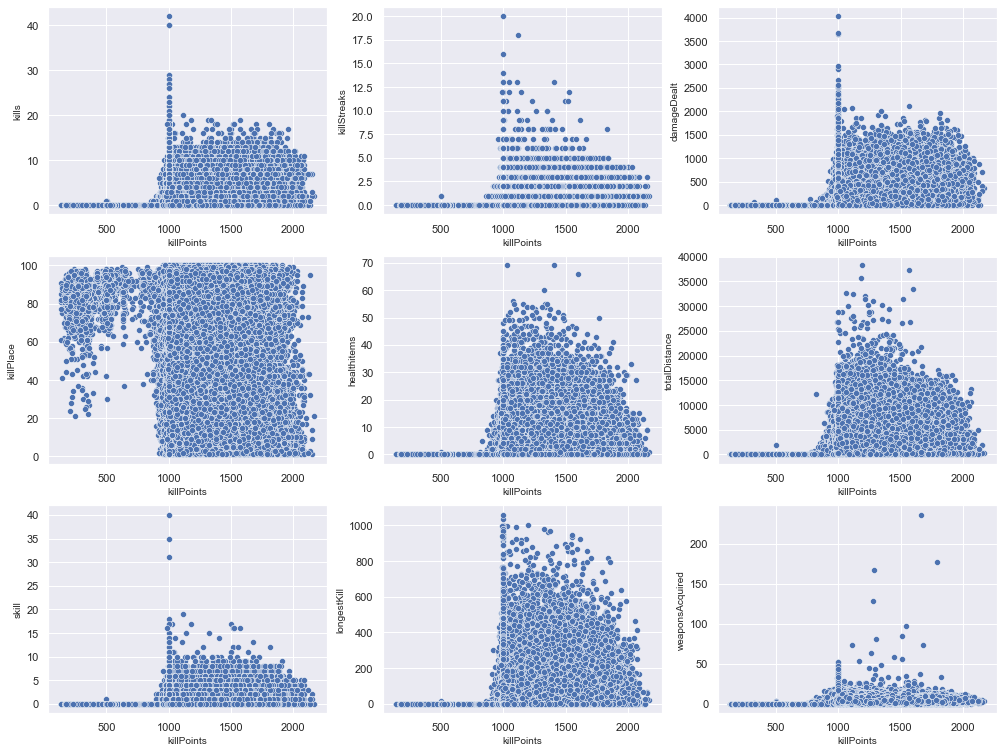

In [ ]:
plt.figure(figsize=(17,13))
plt.subplot(3,3,1)
sns.scatterplot(data = idx_nm, x="killPoints", y='kills')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('kills',fontsize=10)

plt.subplot(3,3,2)
sns.scatterplot(data = idx_nm, x="killPoints", y='killStreaks')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('killStreaks',fontsize=10)

plt.subplot(3,3,3)
sns.scatterplot(data = idx_nm, x="killPoints", y='damageDealt')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.subplot(3,3,4)
sns.scatterplot(data = idx_nm, x="killPoints", y='killPlace')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('killPlace',fontsize=10)

plt.subplot(3,3,5)
sns.scatterplot(data = idx_nm, x="killPoints", y='healthitems')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('healthitems',fontsize=10)

plt.subplot(3,3,6)
sns.scatterplot(data = idx_nm, x="killPoints", y='totalDistance')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('totalDistance',fontsize=10)

plt.subplot(3,3,7)
sns.scatterplot(data = idx_nm, x="killPoints", y='skill')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('skill',fontsize=10)

plt.subplot(3,3,8)
sns.scatterplot(data = idx_nm, x="killPoints", y='longestKill')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('longestKill',fontsize=10)

plt.subplot(3,3,9)
sns.scatterplot(data = idx_nm, x="killPoints", y='weaponsAcquired')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('weaponsAcquired',fontsize=10)

plt.show()

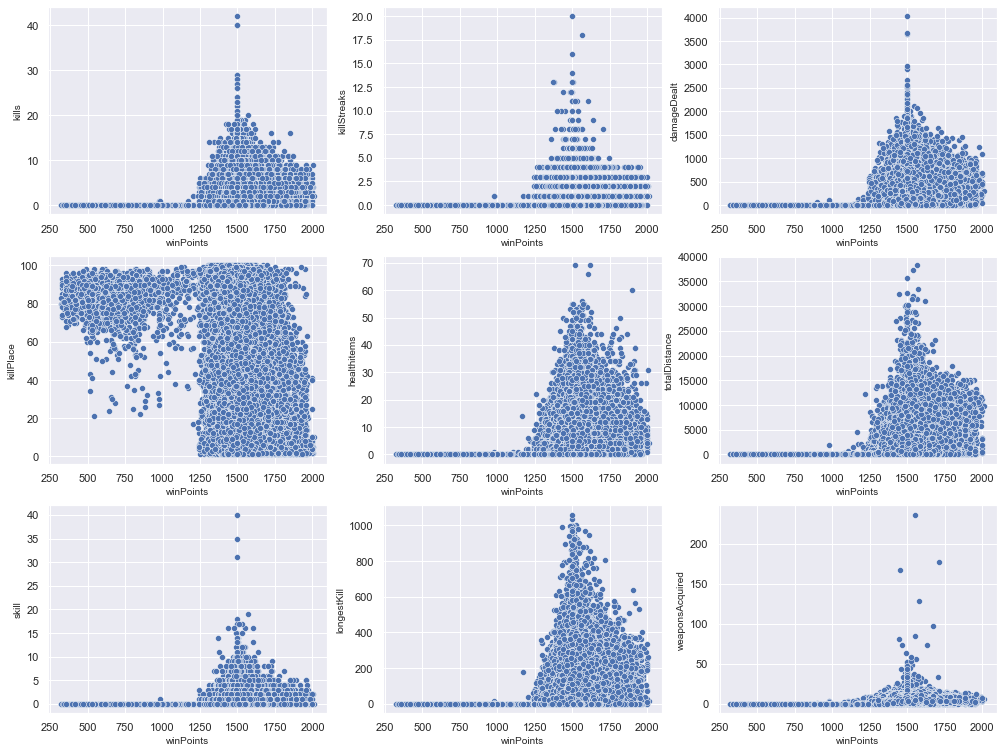

In [ ]:
plt.figure(figsize=(17,13))
plt.subplot(3,3,1)
sns.scatterplot(data = idx_nm, x="winPoints", y='kills')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('kills',fontsize=10)

plt.subplot(3,3,2)
sns.scatterplot(data = idx_nm, x="winPoints", y='killStreaks')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('killStreaks',fontsize=10)

plt.subplot(3,3,3)
sns.scatterplot(data = idx_nm, x="winPoints", y='damageDealt')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.subplot(3,3,4)
sns.scatterplot(data = idx_nm, x="winPoints", y='killPlace')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('killPlace',fontsize=10)

plt.subplot(3,3,5)
sns.scatterplot(data = idx_nm, x="winPoints", y='healthitems')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('healthitems',fontsize=10)

plt.subplot(3,3,6)
sns.scatterplot(data = idx_nm, x="winPoints", y='totalDistance')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('totalDistance',fontsize=10)

plt.subplot(3,3,7)
sns.scatterplot(data = idx_nm, x="winPoints", y='skill')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('skill',fontsize=10)

plt.subplot(3,3,8)
sns.scatterplot(data = idx_nm, x="winPoints", y='longestKill')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('longestKill',fontsize=10)

plt.subplot(3,3,9)
sns.scatterplot(data = idx_nm, x="winPoints", y='weaponsAcquired')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('weaponsAcquired',fontsize=10)

plt.show()

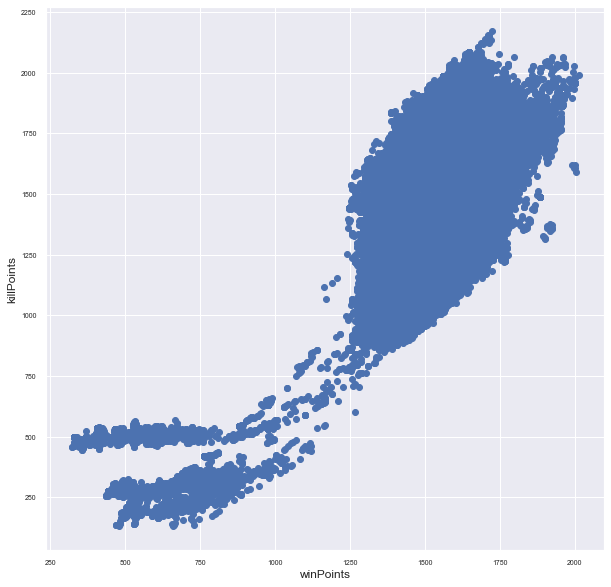

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(idx_nm['winPoints'],idx_nm['killPoints'])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('winPoints')
plt.ylabel('killPoints')
plt.show()

- 두 포인트 다 뚜렷한 인사이트 도출할 수 없다.
- killpoints는 1240점, winpoints는 1500점을 기본 점수로 설정한 듯 하다.

In [ ]:
idx_nm_1 = df[df.rankPoints > 0]
idx_nm_1['rankPoints'].value_counts()

1500    297403
1480     48702
1494     42525
1490     42133
1497     40071
         ...  
2969         1
4450         1
2430         1
5159         1
2962         1
Name: rankPoints, Length: 2212, dtype: int64

In [ ]:
idx_nm_1[['rankPoints','killPoints','winPoints']].describe()

rankPoints  killPoints  winPoints
count  2.643240e+06   2643240.0  2643240.0
mean   1.494115e+03         0.0        0.0
std    8.865185e+01         0.0        0.0
min    1.000000e+02         0.0        0.0
25%    1.465000e+03         0.0        0.0
50%    1.496000e+03         0.0        0.0
75%    1.513000e+03         0.0        0.0
max    5.910000e+03         0.0        0.0

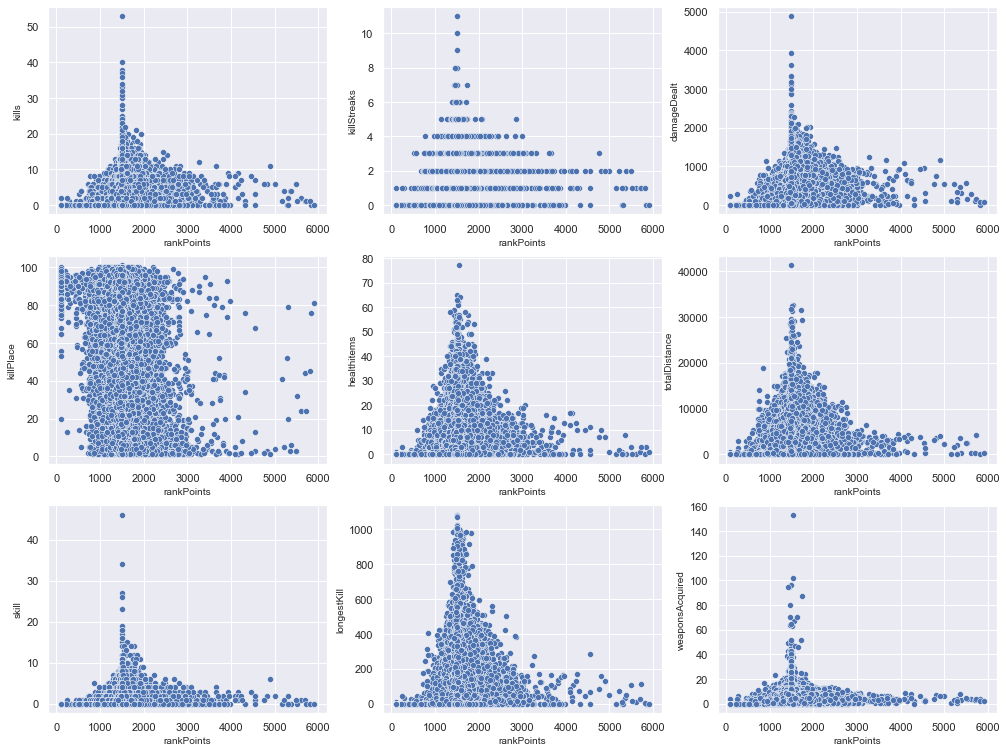

In [ ]:
plt.figure(figsize=(17,13))
plt.subplot(3,3,1)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='kills')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('kills',fontsize=10)

plt.subplot(3,3,2)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='killStreaks')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('killStreaks',fontsize=10)

plt.subplot(3,3,3)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='damageDealt')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.subplot(3,3,4)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='killPlace')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('killPlace',fontsize=10)

plt.subplot(3,3,5)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='healthitems')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('healthitems',fontsize=10)

plt.subplot(3,3,6)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='totalDistance')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('totalDistance',fontsize=10)

plt.subplot(3,3,7)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='skill')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('skill',fontsize=10)

plt.subplot(3,3,8)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='longestKill')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('longestKill',fontsize=10)

plt.subplot(3,3,9)
sns.scatterplot(data = idx_nm_1, x="rankPoints", y='weaponsAcquired')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('weaponsAcquired',fontsize=10)

plt.show()

- -1(none),0(none),1500(중간값)
- 상위 랭커들은 운영적으로 해서 많이 분산된 반면 1500점대 유저들은 전략이 부족하다보니 운이나 실력등이 산재되어 있는듯하다.
- 또한 시즌이 바뀌면서 오랜만에 들어오지만 게임을 잘하는 경우는 제대로 rankPoints가 반영이 안되어 있는 듯 하다.
- 상위 랭커들은 winPlace를 통해 다시 분석할 필요가 있다.

In [ ]:
# MinMaxScaler로 정규화
df_Points = df[['killPoints','winPoints','rankPoints','damageDealt']]
from sklearn.preprocessing import MinMaxScaler

feature_names = ['killPoints','winPoints','rankPoints','damageDealt']

scaler = MinMaxScaler()
scaler.fit(df_Points)
points_scaled = scaler.transform(df_Points)
points_df_scaled = pd.DataFrame(data=points_scaled, columns=feature_names)
points_df_scaled

killPoints  winPoints  rankPoints  damageDealt
0          0.571889   0.728266    0.000000     0.000000
1          0.000000   0.000000    0.251227     0.018719
2          0.000000   0.000000    0.252411     0.013912
3          0.000000   0.000000    0.238369     0.006732
4          0.000000   0.000000    0.264084     0.020458
...             ...        ...         ...          ...
4425367    0.474194   0.748634    0.000000     0.000000
4425368    0.000000   0.000000    0.254103     0.009034
4425369    0.000000   0.000000    0.253933     0.012083
4425370    0.000000   0.000000    0.240061     0.036902
4425371    0.000000   0.000000    0.269159     0.054828

[4425372 rows x 4 columns]

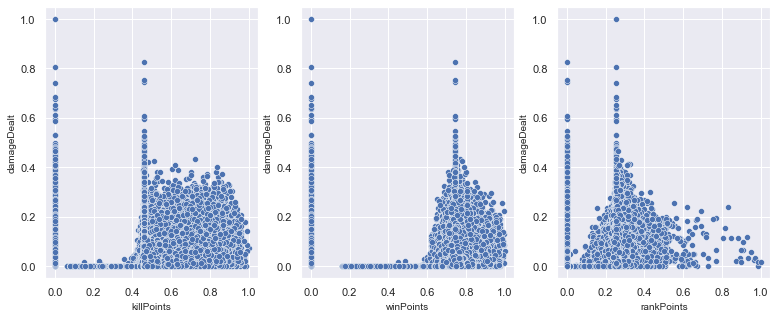

In [ ]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.scatterplot(data = points_df_scaled, x="killPoints", y='damageDealt')
plt.xlabel('killPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.subplot(1,3,2)
sns.scatterplot(data = points_df_scaled, x="winPoints", y='damageDealt')
plt.xlabel('winPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.subplot(1,3,3)
sns.scatterplot(data = points_df_scaled, x="rankPoints", y='damageDealt')
plt.xlabel('rankPoints',fontsize=10)
plt.ylabel('damageDealt',fontsize=10)

plt.show()

- 밀집 구간, 수치, 경향 모든게 달라서 컬럼 자체를 사용하기 어려움
- 나중에 결론 부분에서 활용 가능성 모색
- 전부 컬럼 드롭

### 박성원 - boosts, heals, weaponsAcquired, rideDistance, swimDistance, walkDistance, roadKills, vehicleDestroys

In [ ]:
df_todo = df.loc[:,["kills", "matchType", "boosts","heals","weaponsAcquired","rideDistance"
                    ,"swimDistance","walkDistance","roadKills","vehicleDestroys"
                    ,"winPlacePerc"]]

#### columns 특성
- 연속형 변수 : "rideDistance","swimDistance","walkDistance","winPlacePerc"
- 이산형 변수 : "boosts","heals","weaponsAcquired","roadKills","vehicleDestroys"

In [ ]:
df_todo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4425372 entries, 0 to 4446965
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   kills            int8   
 1   matchType        object 
 2   boosts           int8   
 3   heals            int8   
 4   weaponsAcquired  int16  
 5   rideDistance     float16
 6   swimDistance     float16
 7   walkDistance     float16
 8   roadKills        int8   
 9   vehicleDestroys  int8   
 10  winPlacePerc     float16
dtypes: float16(4), int16(1), int8(5), object(1)
memory usage: 130.8+ MB


In [ ]:
df_todo.describe()

kills        boosts         heals  weaponsAcquired  \
count  4.425372e+06  4.425372e+06  4.425372e+06     4.425372e+06   
mean   8.900273e-01  1.093459e+00  1.354064e+00     3.638044e+00   
std    1.440895e+00  1.698462e+00  2.659558e+00     2.368900e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00     2.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00     3.000000e+00   
75%    1.000000e+00  2.000000e+00  2.000000e+00     5.000000e+00   
max    5.300000e+01  3.300000e+01  7.300000e+01     2.360000e+02   

       rideDistance  swimDistance  walkDistance     roadKills  \
count  4.425372e+06     4425372.0    4425372.00  4.425372e+06   
mean            NaN           NaN           NaN  3.450783e-03   
std             NaN           NaN           NaN  7.282567e-02   
min    0.000000e+00           0.0          0.00  0.000000e+00   
25%    0.000000e+00           0.0        154.25  0.000000e+00   
50%    0.000000e+00           0.0        678.00  0.000000e+00   
75%    1.860046e-02           0.0       1964.00  0.000000e+00   
max    4.070400e+04        3824.0      25776.00  1.800000e+01   

       vehicleDestroys  winPlacePerc  
count     4.425372e+06  4.425371e+06  
mean      7.764997e-03           NaN  
std       9.166268e-02  0.000000e+00  
min       0.000000e+00  0.000000e+00  
25%       0.000000e+00  1.978760e-01  
50%       0.000000e+00  4.575195e-01  
75%       0.000000e+00  7.407227e-01  
max       5.000000e+00  1.000000e+00

#### total variable 만들기
- total_item
- total_distance

In [ ]:
df["total_item"] = df.boosts + df.heals
df["total_distance"] = df.rideDistance + df.walkDistance + df.swimDistance

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_distance', ylabel='total_item'>

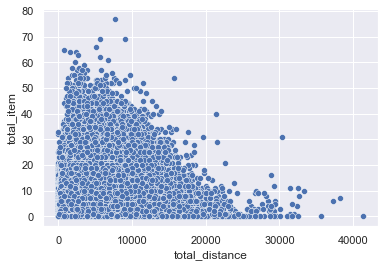

In [ ]:
sns.scatterplot(df.total_distance,df.total_item)

#### correlation
walkDistance: 0.81
오래 살아남으면, 많이 걸을 수밖에 없다!
 - 많이 걸었는데, 낮은 등수가 얼마나 있을까?

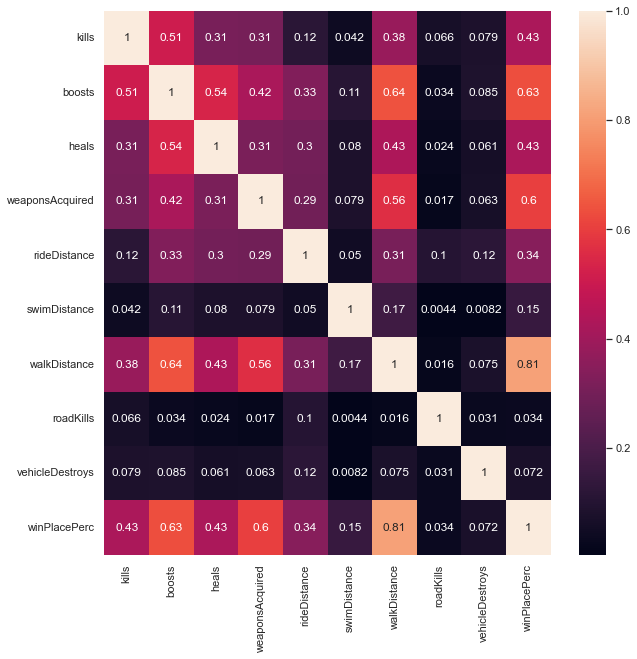

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_todo.corr(),
            annot=True)
plt.show()

In [ ]:
df_todo_discrete = df_todo.loc[:,["boosts","heals","weaponsAcquired","roadKills"
                                  ,"vehicleDestroys"]]
df_todo_continuous = df_todo.loc[:,["rideDistance","swimDistance","walkDistance"]]

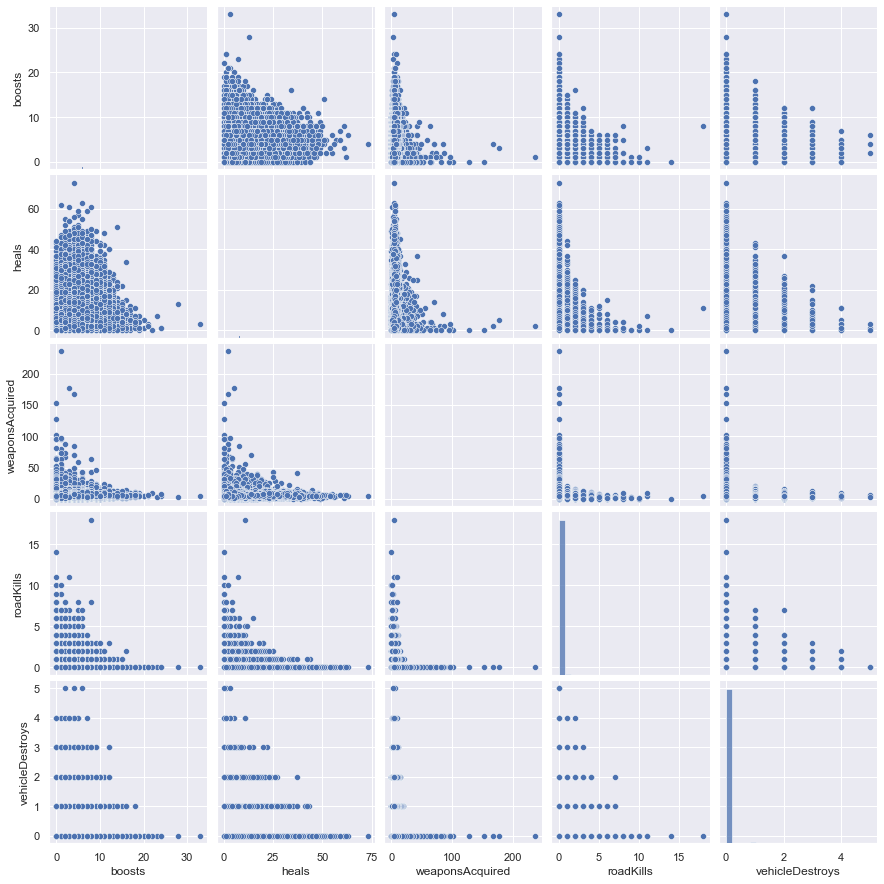

In [ ]:
sns.pairplot(df_todo_discrete)

#### def PLOT

In [ ]:
def countplot(columns,xsize=10,ysize=7,hue=None):
    plt.figure(figsize=(xsize,ysize))
    sns.countplot(columns,hue=hue)
    plt.show()
    print(columns.value_counts())

In [ ]:
def boxplot(columns,xsize=10,ysize=7):
    plt.figure(figsize=(xsize,ysize))
    sns.boxplot(columns)
    plt.show()

In [ ]:
def scatterplot(columns_1,columns_2,x=10,y=7,hue=None,alpha=None,size=None,style=None):
    plt.figure(figsize=(x,y))
    sns.scatterplot(x=columns_1,y=columns_2,hue=hue,alpha=alpha,size=size,style=style)
    plt.show()

#### Outlier detection
정규분포일때, 이상치 판단 기준

아래 기준을 벗어나는 경우에, 데이터 비율이 같은 경우!

In [ ]:
df_todo.columns

Index(['kills', 'matchType', 'boosts', 'heals', 'weaponsAcquired',
       'rideDistance', 'swimDistance', 'walkDistance', 'roadKills',
       'vehicleDestroys', 'winPlacePerc'],
      dtype='object')

#### Discrete distribution

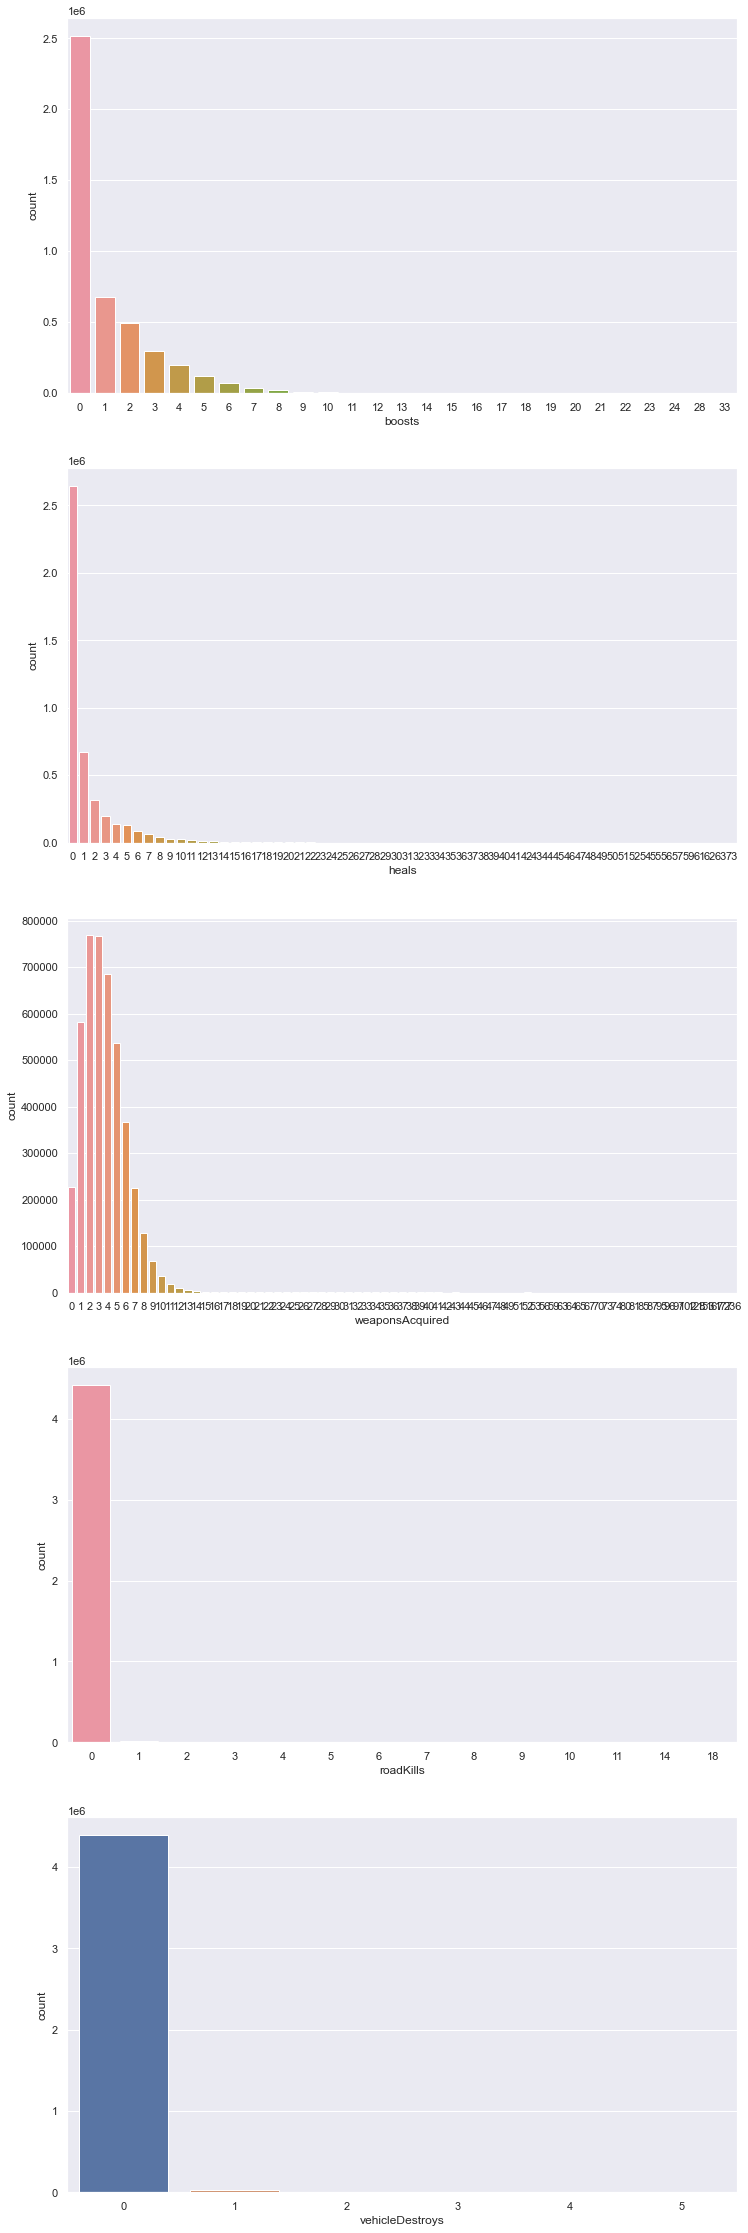

In [ ]:
plt.figure(figsize=(12,len(df_todo_discrete.columns)*8))
for i in range(len(df_todo_discrete.columns)):
    plt.subplot(len(df_todo_discrete.columns),1,i+1)
    sns.countplot(data=df,x=df_todo_discrete.columns[i])
plt.show()

#### boosts

In [ ]:
df.boosts.quantile(0.99)
print(f"drop rows : {len(df)-len(df[df.boosts <= 7])}")

drop rows : 32377


/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='boosts', ylabel='winPlacePerc'>

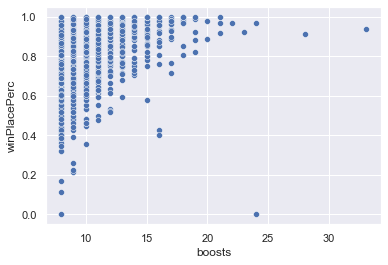

In [ ]:
sns.scatterplot(df[df.boosts > 7].boosts,df.winPlacePerc)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='boosts', ylabel='winPlacePerc'>

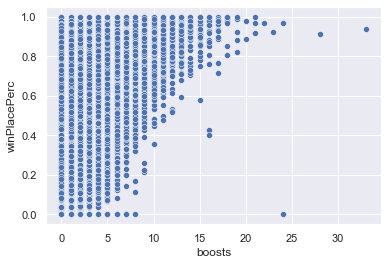

In [ ]:
sns.scatterplot(df.boosts,df.winPlacePerc)

In [ ]:
# boosts outlier
df[df.boosts>22][df.winPlacePerc<0.2]

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1355/1345176954.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.boosts>22][df.winPlacePerc<0.2]


Id         groupId         matchId  assists  boosts  \
3979434  d16b329d5ea64f  ba50388b7256f1  57770aadb2235b        0      24   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
3979434          0.0      0              0      1          4           0   

         kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
3979434      0            0          0.0           1808      solo        15   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
3979434          2        1500        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
3979434           0.0          0                0        267.25   

         weaponsAcquired  winPoints  winPlacePerc  isnormal  healthitems  \
3979434                8          0           0.0         0           25   

         totalDistance  skill  total_item  total_distance  
3979434         267.25      0          25          267.25

In [ ]:
df_drop = df.copy()

In [ ]:
df_drop = df_drop.drop(df_drop[df_drop.boosts>22][df_drop.winPlacePerc<0.2].index)

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1355/2268741575.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop = df_drop.drop(df_drop[df_drop.boosts>22][df_drop.winPlacePerc<0.2].index)


#### heals - no outliers

In [ ]:
df_drop.heals.quantile(0.99)
print(f"drop rows : {len(df_drop)-len(df_drop[df_drop.heals <= 12])}")

drop rows : 41771


/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heals', ylabel='winPlacePerc'>

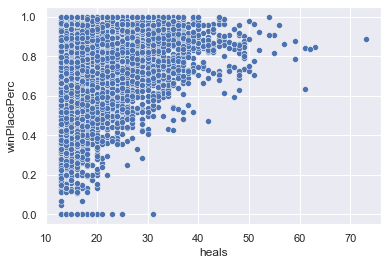

In [ ]:
sns.scatterplot(df_drop[df_drop.heals>12].heals, df_drop.winPlacePerc)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heals', ylabel='winPlacePerc'>

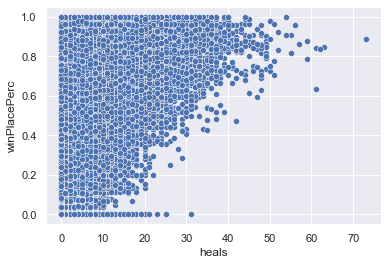

In [ ]:
sns.scatterplot(df_drop.heals, df_drop.winPlacePerc)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_item', ylabel='winPlacePerc'>

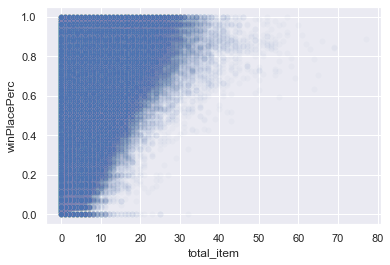

In [ ]:
sns.scatterplot(df.total_item, df.winPlacePerc,alpha=0.03)

In [ ]:
df_drop[df_drop.winPlacePerc==0][df_drop.total_item>10]

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1355/3692317368.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop[df_drop.winPlacePerc==0][df_drop.total_item>10]


Id         groupId         matchId  assists  boosts  \
32453    c525184d3a47df  94871c112912f3  93edb943c25530        2       6   
288773   cd9359a3dabbbe  d18dedb8a813e7  9a4e500e3cf355        2       0   
351887   5f6924d85214e5  eda174acfb503b  4c6b1a0e4cb346        1       0   
466813   b79cb5273c905c  14d6b54cdec6bc  b30f3d87189aa6        0       0   
620748   44c2820fd5e8ba  a237ba2e700a74  b3bbd4ad876ec4        0       6   
692539   912c0a4f6c998c  eda174acfb503b  4c6b1a0e4cb346        9       0   
772638   a7ffd45413f2d4  e11ad5e2354e2c  0a3c9395fa3475        0       1   
775920   4c5cff5a32c6ee  19a51104f8cba4  9982c360bd5d66        2       3   
869322   a5ea3cd8b89dda  9387009bb7252f  98f474e16f103d        0       3   
954234   55ce81376f25e9  f44a7909d8b0af  3880c9a5069d57        0       6   
956629   444bc35cd892c2  cf25deca902e2d  93114276776fd6        0       4   
1078659  dcc84e3c79da98  0679c41126c653  846c0bda367c83        4       4   
1142652  bf80c76526d516  273d1822ab46df  2a7474cd8c7625        2       0   
1227445  65a71d6ab94a69  0679c41126c653  846c0bda367c83        3       1   
1314581  0d0a6b8e424136  14d6b54cdec6bc  b30f3d87189aa6        2       7   
1485093  79be043b803d51  841b633566110d  632569d3600c4b        0       1   
1515162  620d62e2e34624  19a51104f8cba4  9982c360bd5d66        4       2   
1678398  2518ca2383b0e2  eda174acfb503b  4c6b1a0e4cb346        4       0   
1688169  e795d405fa443b  93ee72ce75980c  893f79c2380a16        1       5   
1768363  acddb1a061df89  5b9d1c17e10876  5800d69224eba4       12       0   
2136975  affd55c4afe888  0679c41126c653  846c0bda367c83        1       3   
2150170  4e8cc97e9b8e4c  567d1f5f1ee166  50ce59f0a0b92d        0       1   
2157717  0df13eee9f61a0  eda174acfb503b  4c6b1a0e4cb346        3       0   
2203490  e96d4750410f26  016b66b4ce8056  377ce1be032fc4        1       0   
2256110  2b6dcf71e0180f  73272ff064534d  45333b04f731c8        0       2   
2309268  561a4abb5f96f0  eda174acfb503b  4c6b1a0e4cb346        3       0   
2444562  c9abed78211a70  a62c58f7c5fb46  ff9cd80c0d8fb7        0       3   
2821990  814fdd3aea52fc  4e13d8e83a29dc  52ee3f5bdb6162        0       1   
2888960  2300bc2c810068  07aacba3f0dbc9  08dfa30b9390f7        1       0   
3018265  639907c9c2d5bf  9057fb638ffbef  cf570be15a4246        0       2   
3100028  fda22f5de9afec  1fd1bf6dc8b047  3076c4618c6638        0       0   
3153684  56348928a1e3c8  1fd1bf6dc8b047  3076c4618c6638        0       0   
3170486  8ade33926b60ef  14d6b54cdec6bc  b30f3d87189aa6        0       6   
3217625  912f1a62d3448e  cba97a251dc554  70f54c8eb2404b        0       0   
3268787  211152a38d6188  eda174acfb503b  4c6b1a0e4cb346        4       0   
3291564  f06591236979fb  eda174acfb503b  4c6b1a0e4cb346        6       0   
3311906  85e4a8f32677c1  10af5b3fa11740  3f1035912f5588        0       6   
3315373  3212b429373a31  14d6b54cdec6bc  b30f3d87189aa6        1       2   
3388284  4cc9f9bd5e3766  4e13d8e83a29dc  52ee3f5bdb6162        0       1   
3392673  48fd9cd332fb7a  14d6b54cdec6bc  b30f3d87189aa6        1       1   
3473897  5591219aa3346e  c56a81d19e0ad5  b8f43750b846e1        0       2   
3601984  fe7fe183d62743  dca35f1d208e39  a0959420e8500a        0       7   
3618246  5f1f1e77fc06e2  a37451fce4d5bb  c7334d06e85f46        0       4   
3658286  04dbb82d217bef  19a51104f8cba4  9982c360bd5d66        4       2   
3683364  d0fa2ab1ca2ef9  eda174acfb503b  4c6b1a0e4cb346        6       0   
3837167  5668ab93d309a3  fca7698a7b958d  b829fdd1fa54b6        0       4   
3992324  b3ffb3726a1961  b935087dbca525  475e676fadb37d        3       0   
4014243  7703ac7e6dbdbd  be2de98dc51131  341341834b7941        0       3   
4088974  77b35d03e44790  be2de98dc51131  341341834b7941        0       4   
4110904  ccd28efa8f02fd  14d6b54cdec6bc  b30f3d87189aa6        1       5   
4118763  dfc734b43822db  eda174acfb503b  4c6b1a0e4cb346        2       0   
4164861  c8c0e7424e0967  a62c58f7c5fb46  ff9cd80c0d8fb7        0     

#### winPlacePerc 를, 상위등수 중위 하위등수로 나누어서 분석

In [ ]:
df_drop["winPlaceCate"] = pd.cut(df_drop.winPlacePerc, bins=[-1,0.1,0.9,1.1], #나누는 구간 #bins=3이면 동일한 길이의 3구간으로 나누어짐
labels=["low","middle","top"] #label명 #labels를 입력하지 않으면 나눈 기준이 label명이 됌
)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winPlaceCate', ylabel='count'>

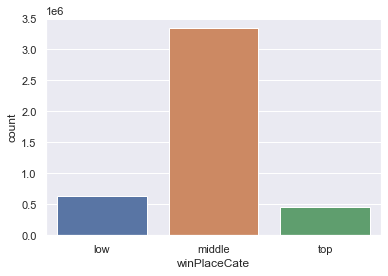

In [ ]:
sns.countplot(df_drop.winPlaceCate)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='winPlacePerc', ylabel='Density'>

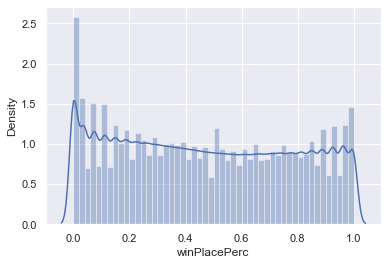

In [ ]:
sns.distplot(df_drop.winPlacePerc)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


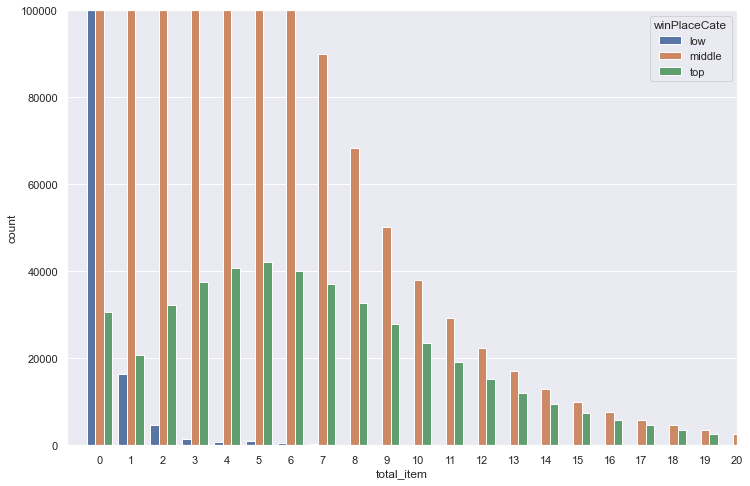

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df_drop.total_item,hue=df_drop.winPlaceCate)
plt.xlim([-1,20])
plt.ylim([0,100000])
plt.show()

In [ ]:
#df_drop[df_drop.total_item==0].winPlaceCate.value_counts()

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


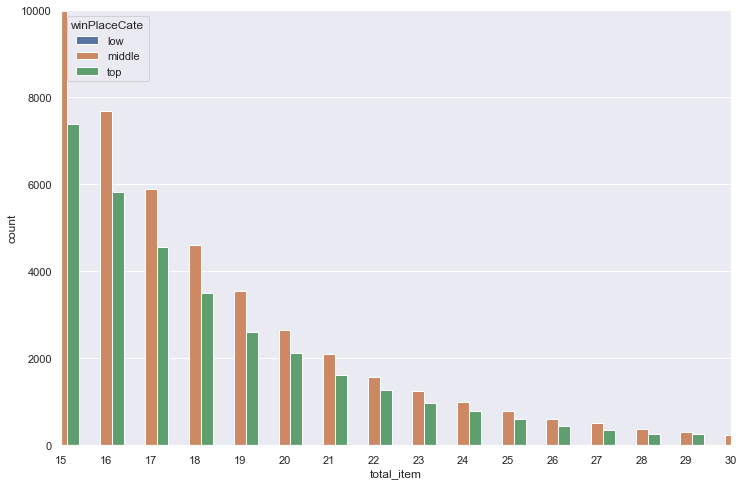

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df_drop.total_item,hue=df_drop.winPlaceCate)
plt.xlim([15,30])
plt.ylim([0,10000])
plt.show()

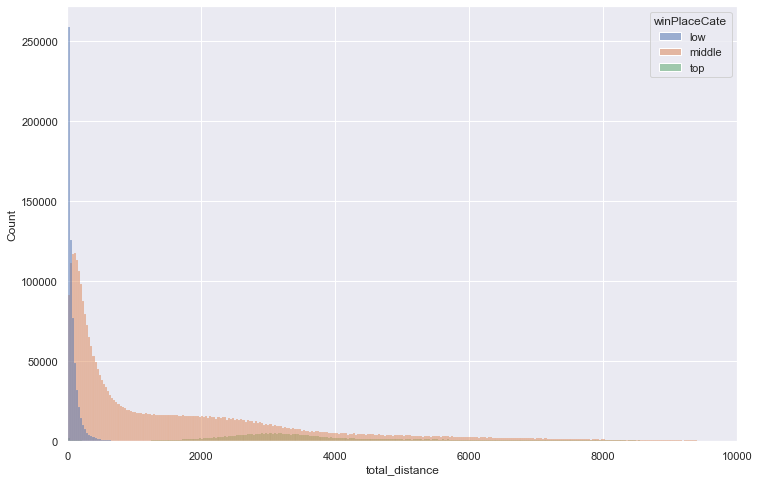

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_drop, x="total_distance",hue="winPlaceCate")
plt.xlim([0,10000])
plt.show()

#### Continuous distribution

In [ ]:
df[["rideDistance","walkDistance","swimDistance"]].describe()

rideDistance  walkDistance  swimDistance
count  4.425372e+06    4425372.00     4425372.0
mean            NaN           NaN           NaN
std             NaN           NaN           NaN
min    0.000000e+00          0.00           0.0
25%    0.000000e+00        154.25           0.0
50%    0.000000e+00        678.00           0.0
75%    1.860046e-02       1964.00           0.0
max    4.070400e+04      25776.00        3824.0

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

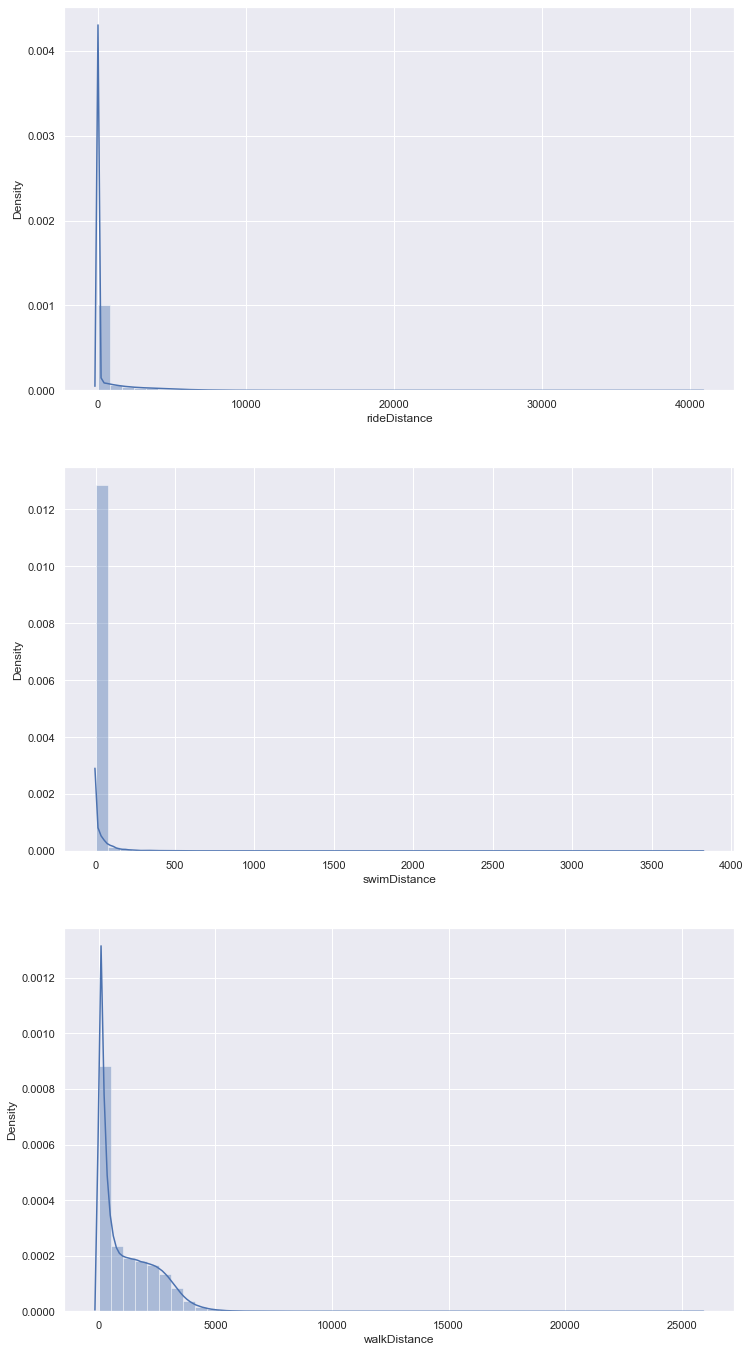

In [ ]:
plt.figure(figsize=(12,len(df_todo_continuous.columns)*8))
plt.subplot(len(df_todo_continuous.columns),1,1)
sns.distplot(df.rideDistance)
plt.subplot(len(df_todo_continuous.columns),1,2)
sns.distplot(df.swimDistance)
plt.subplot(len(df_todo_continuous.columns),1,3)
sns.distplot(df.walkDistance)
plt.show()

#### total_distance outlier
- distance가 0이면서, winPlacePerc가 1인 것들 이상치로 판단

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_distance', ylabel='winPlacePerc'>

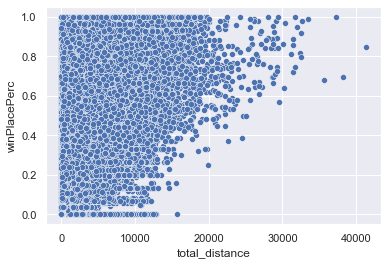

In [ ]:
sns.scatterplot(df_drop.total_distance,df_drop.winPlacePerc)

In [ ]:
df_drop=df_drop.drop(df_drop[df_drop.winPlacePerc==1][df_drop.total_distance==0].index)

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1355/598386244.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop=df_drop.drop(df_drop[df_drop.winPlacePerc==1][df_drop.total_distance==0].index)


#### weaponAcquired

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


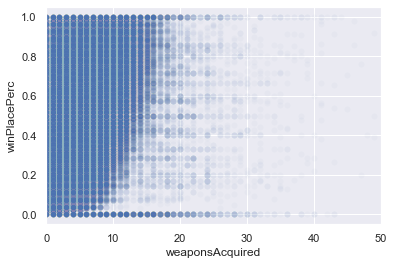

In [ ]:
sns.scatterplot(df_drop.weaponsAcquired,df_drop.winPlacePerc, alpha=0.03)
plt.xlim([0,50])
plt.show()

In [ ]:
df_drop = df_drop.drop(df_drop[df_drop.weaponsAcquired>30].index)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


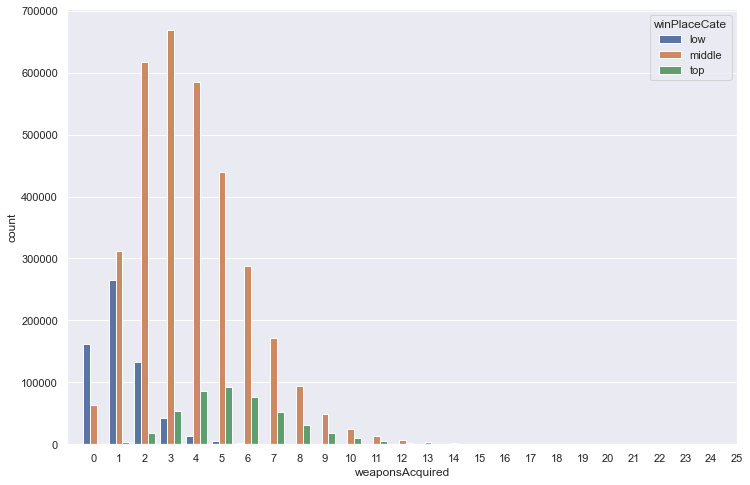

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df_drop.weaponsAcquired,hue=df_drop.winPlaceCate)
plt.xlim([-1,25])
# plt.ylim([0,10000])
plt.show()

In [ ]:
# weaponsAcquired outlier
df_drop = df_drop.drop(df_drop[df_drop.winPlacePerc==0][df_drop.weaponsAcquired>16].index)

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1355/3856722964.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop = df_drop.drop(df_drop[df_drop.winPlacePerc==0][df_drop.weaponsAcquired>16].index)


#### roadKills - outlier 없음

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='roadKills', ylabel='winPlacePerc'>

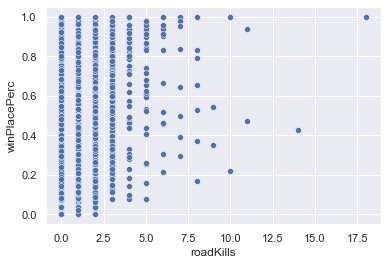

In [ ]:
sns.scatterplot(df_drop.roadKills,df_drop.winPlacePerc)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


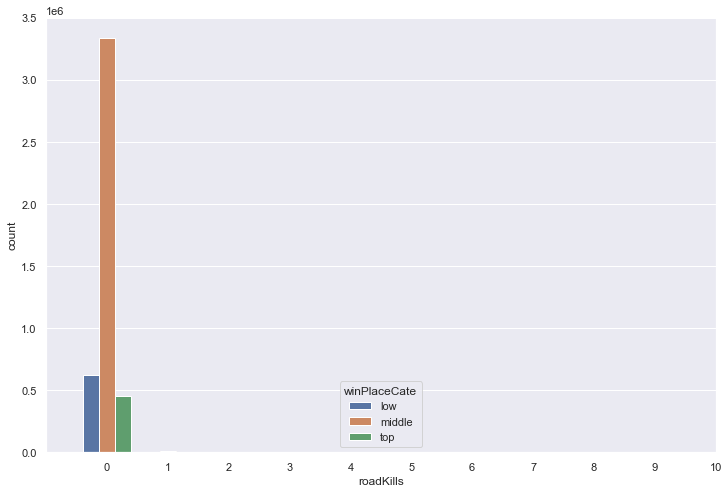

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df_drop.roadKills,hue=df_drop.winPlaceCate)
plt.xlim([-1,10])
# plt.ylim([0,10000])
plt.show()

In [ ]:
df_drop.roadKills.value_counts()

0     4411142
1       11063
2        1272
3         291
4          70
5          36
6          20
7           9
8           7
9           2
11          2
10          2
14          1
18          1
Name: roadKills, dtype: int64

In [ ]:
df_drop.roadKills.quantile(0.999)

1.0

In [ ]:
df_drop[df_drop.roadKills>2].winPlaceCate.value_counts()

middle    286
top       150
low         5
Name: winPlaceCate, dtype: int64

#### vehicleDestroys - outlier 없음

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicleDestroys', ylabel='winPlacePerc'>

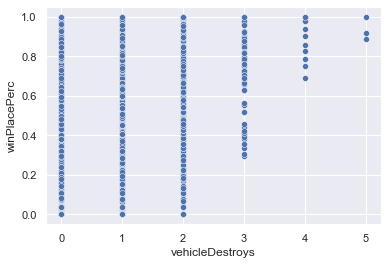

In [ ]:
sns.scatterplot(df_drop.vehicleDestroys,df_drop.winPlacePerc)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


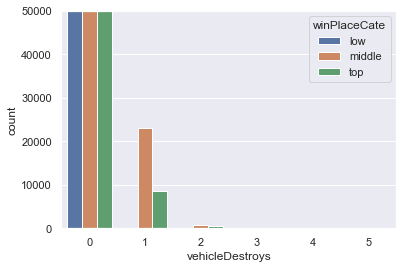

In [ ]:
sns.countplot(df_drop.vehicleDestroys,hue=df_drop.winPlaceCate)
plt.ylim([0,50000])
plt.show()

#### strange data
weaponsAcquired==0 and winPlacePerc==1

In [ ]:
df_drop=df_drop.drop(df_drop[df_drop.weaponsAcquired==0][df_drop.winPlacePerc==1].index)

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1355/3132441101.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drop=df_drop.drop(df_drop[df_drop.weaponsAcquired==0][df_drop.winPlacePerc==1].index)


### map 크기에 따라서 다른 분포를 나타낸다
봉우리가 2개!!

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='matchDuration', ylabel='heals'>

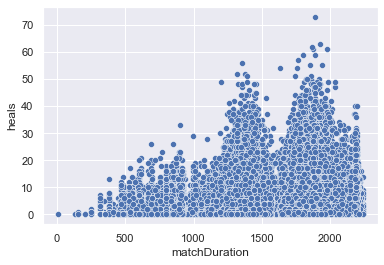

In [ ]:
sns.scatterplot(df.matchDuration,df.heals)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='matchDuration', ylabel='boosts'>

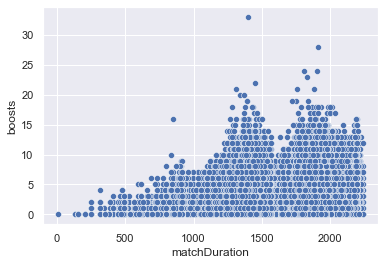

In [ ]:
sns.scatterplot(df.matchDuration,df.boosts)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='matchDuration', ylabel='total_item'>

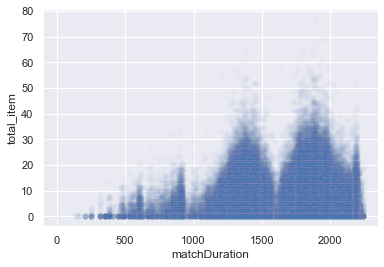

In [ ]:
sns.scatterplot(df.matchDuration,df.total_item,alpha=0.03)

#### 파밍만 하다가 죽은 사람 (노잼사망)

In [ ]:
tedious_play = df[(df.heals==0)][df.boosts==0][df.matchDuration>1800]

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1355/3782159478.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tedious_play = df[(df.heals==0)][df.boosts==0][df.matchDuration>1800]


/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


nan nan
nan nan


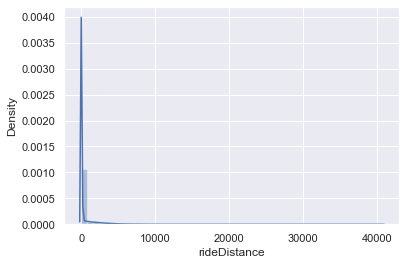

In [ ]:
sns.distplot(tedious_play.rideDistance)
print(df.rideDistance.mean()
    ,tedious_play.rideDistance.mean())
print(df.swimDistance.mean()
    ,tedious_play.swimDistance.mean())

### 다중공선성 의심 kills <-> damageDealt
하나의 데이터만 머신러닝에 사용

VIF 활용

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='damageDealt', ylabel='total_item'>

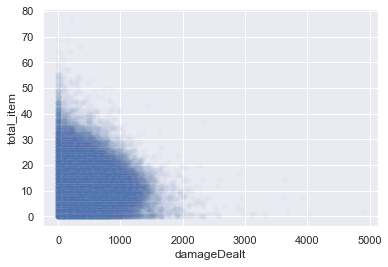

In [ ]:
sns.scatterplot(df.damageDealt,df.total_item,alpha=0.03)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kills', ylabel='damageDealt'>

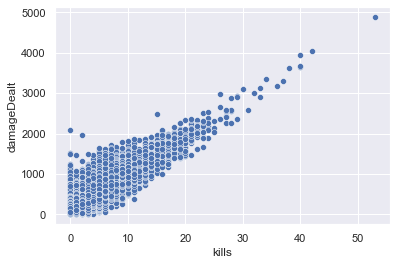

In [ ]:
sns.scatterplot(df.kills,df.damageDealt)

### 사용자설정게임 여부
- "ma"==0 : ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo']
- "ma"==1 : other

In [ ]:
name_list = ['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo']
df_todo_true = df_todo[df_todo["matchType"].isin(name_list) == True]
df_todo_true["ma"] = 0
# df_todo_true.tail(2)
df_todo_false = df_todo[df_todo["matchType"].isin(name_list) == False]
df_todo_false["ma"] = 1
# df_todo_false.tail(2)
df_todo_concat = pd.concat([df_todo_true,df_todo_false],axis=0)
# df_todo_concat.tail()

/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1355/1948729679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_todo_true["ma"] = 0
/var/folders/08/_lwb_7pj65z8h_sg1lhlt2lh0000gn/T/ipykernel_1355/1948729679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_todo_false["ma"] = 1


In [ ]:
df_todo_concat.ma.value_counts()

0    4393368
1      32004
Name: ma, dtype: int64

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heals', ylabel='boosts'>

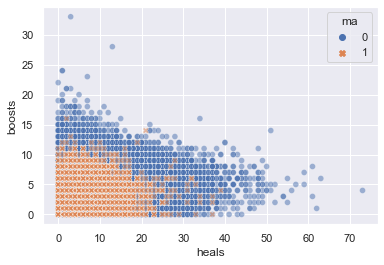

In [ ]:
sns.scatterplot(df_todo_concat.heals,df_todo_concat.boosts,hue=df_todo_concat.ma,alpha=0.5,style=df_todo_concat.ma)

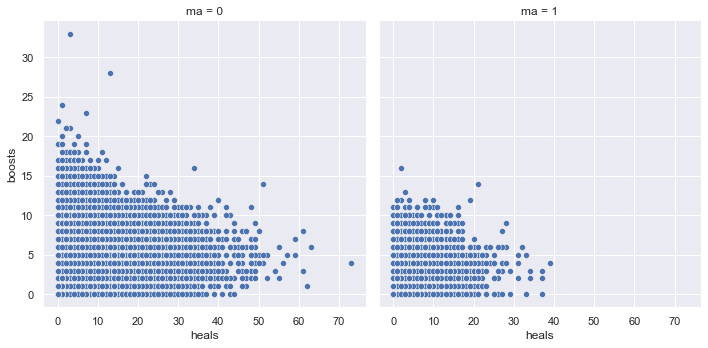

In [ ]:
sns.relplot(
    data=df_todo_concat, x="heals", y="boosts",
    col="ma",kind="scatter"
)

### distance == 0인데, kill이 있다?
ML에 영향 많이 줄 것 같음

outlier로 판단해야 하나?

#### result
print(df_todo_concat[(df_todo_concat.kills > 2) & (df_todo_concat.total_distance == 0)].matchType.value_counts())

In [ ]:
df[(df.kills >= 2) & (df.total_distance == 0)]

Id         groupId         matchId  assists  boosts  \
1824     b538d514ef2476  0eb2ce2f43f9d6  35e7d750e442e2        0       0   
20881    40871bf43ddac7  2cea046b7d1dce  0600f86f11c6e4        0       0   
23298    b950836d0427da  1f735b1e00d549  ad860f4e162bbc        1       0   
24640    aeced11d46de19  d4009ffa95bb4f  73f3ed869c9171        2       0   
25659    6626c4d47cffa0  ee3fe5c0d917c3  341341834b7941        0       1   
...                 ...             ...             ...      ...     ...   
4423018  f772d7a2be33c2  598091d47a7841  0600f86f11c6e4        1       0   
4426500  8cbbe7d8126929  48e0c07e1689f8  88b2a2980a3713        3       2   
4429697  6cc9d7b1643cbd  11fce60d5c8ea3  60c6e90b964266        3       0   
4436511  a59d92769cbd15  c8cb8491112bf6  0104eeb664494d        1       0   
4437516  9a3a0d128dea8f  228b1df91576e9  8a728def0644be        1       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
1824         593.000      0              0      3         18           0   
20881        506.000      4              1      3          7           0   
23298       1124.000      0              4      1          7           0   
24640        530.000      0              2     11         12           0   
25659        128.875      0              1      6         53        1000   
...              ...    ...            ...    ...        ...         ...   
4423018      519.000      6              2      0          9           0   
4426500     1065.000      0              3      6         15           0   
4429697      645.500      6              1      0         28           0   
4436511      221.625      4              2      1         33        1000   
4437516      361.750      3              1      0         45        1000   

         kills  killStreaks  longestKill  matchDuration         matchType  \
1824         6            3    23.546875            593  normal-squad-fpp   
20881        6            2    81.937500            583      normal-squad   
23298       12            5   116.312500            550  normal-squad-fpp   
24640        7            2    84.375000            599  normal-squad-fpp   
25659        2            1    26.984375            732  normal-squad-fpp   
...        ...          ...          ...            ...               ...   
4423018      6            2    57.375000            583      normal-squad   
4426500     10            3    65.437500            899  normal-squad-fpp   
4429697      5            2    57.593750           1216  normal-squad-fpp   
4436511      5            2    47.375000           1091  normal-squad-fpp   
4437516      5            2   109.000000           1198  normal-squad-fpp   

         maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
1824           15         13        1500        0           0.0          0   
20881           6          6        1500        0           0.0          0   
23298           6          6        1500        0           0.0          0   
24640          15         15        1500        0           0.0          0   
25659           8          8          -1        0           0.0          0   
...           ...        ...         ...      ...           ...        ...   
4423018         6          6        1500        0           0.0          0   
4426500         8          8        1500        0           0.0          0   
4429697         6          6        1500        2           0.0          0   
4436511         6          6          -1        0           0.0          0   
4437516        14         14          -1        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
1824              0.0          0                0           0.0   
20881             0.0          0                0           0.0   
23298             0.0          0                0           0.0   
24640             0.0          0                0           0.0  

In [ ]:
print(df[(df.kills != 0) & (df.total_distance == 0)].matchType.value_counts())

normal-squad-fpp    773
solo-fpp            149
normal-solo-fpp      49
normal-squad         34
normal-duo-fpp       27
squad-fpp            26
duo-fpp              21
solo                 21
normal-solo          10
squad                 3
duo                   2
normal-duo            1
Name: matchType, dtype: int64


In [ ]:
df_todo_concat["total_item"] = df_todo_concat.boosts + df_todo_concat.heals
df_todo_concat["total_distance"] = df_todo_concat.rideDistance + df_todo_concat.walkDistance + df_todo_concat.swimDistance

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


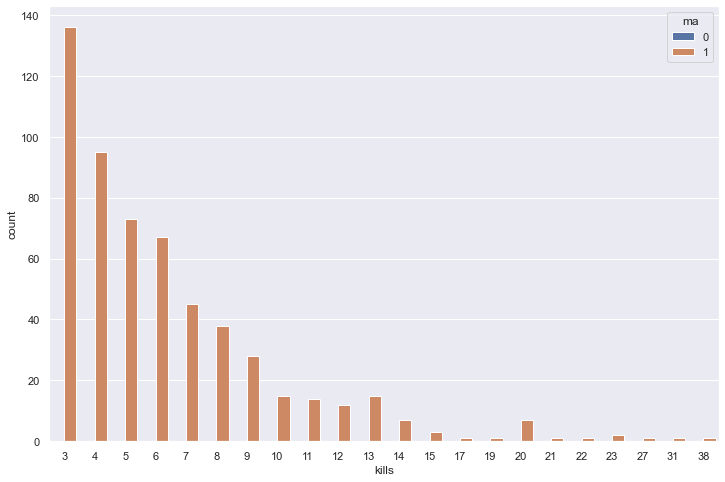

3     136
4      95
5      73
6      67
7      45
8      38
9      28
10     15
13     15
11     14
12     12
14      7
20      7
15      3
23      2
21      1
27      1
38      1
19      1
17      1
31      1
22      1
Name: kills, dtype: int64


In [ ]:
countplot((df_todo_concat[(df_todo_concat.kills > 2) & (df_todo_concat.total_distance == 0)]["kills"]),12,8,hue=df_todo_concat.ma)

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


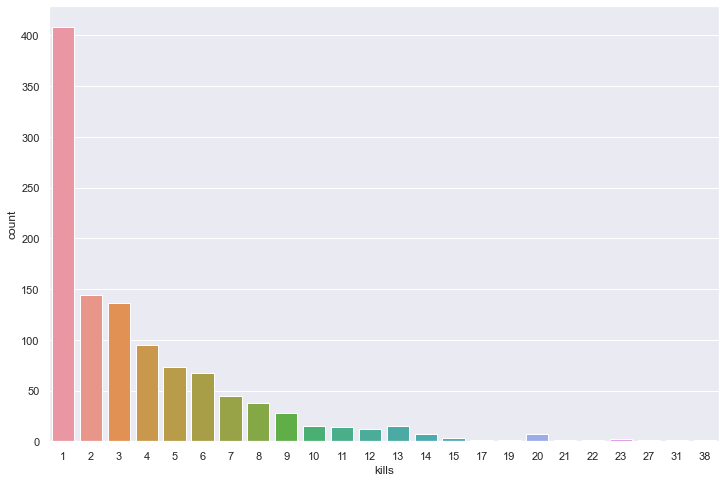

1     408
2     144
3     136
4      95
5      73
6      67
7      45
8      38
9      28
13     15
10     15
11     14
12     12
20      7
14      7
15      3
23      2
27      1
38      1
21      1
19      1
17      1
31      1
22      1
Name: kills, dtype: int64


In [ ]:
countplot((df[(df.kills != 0) & (df.total_distance == 0)]["kills"]),12,8)

In [ ]:
df_todo_concat[(df_todo_concat.kills > 10) & (df_todo_concat.total_item == 0)]["kills"]

72720      11
124986     14
652889     16
999741     15
1414822    14
           ..
4206345    14
4258892    13
4301523    23
4326945    16
4354334    13
Name: kills, Length: 217, dtype: int8

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


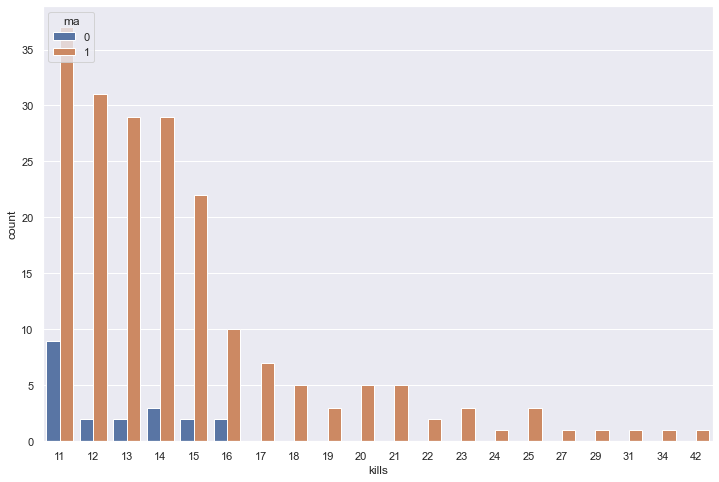

11    46
12    33
14    32
13    31
15    24
16    12
17     7
18     5
20     5
21     5
25     3
19     3
23     3
22     2
42     1
29     1
34     1
31     1
27     1
24     1
Name: kills, dtype: int64


In [ ]:
countplot(df_todo_concat[(df_todo_concat.kills > 10) & (df_todo_concat.total_item == 0)]["kills"],12,8,hue=df_todo_concat.ma)

### featrure combination

In [ ]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'isnormal',
       'healthitems', 'totalDistance', 'skill', 'total_item',
       'total_distance'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4425372 entries, 0 to 4446965
Data columns (total 35 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float16
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float16
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float16
 21  roadKills        int8   
 22  swimDistance     float16
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float16
 26  weaponsAcquired  int16  
 27  winPoints   

In [ ]:
df.damageDealt.tail()

4446961      0.00000
4446962     44.15625
4446963     59.06250
4446964    180.37500
4446965    268.00000
Name: damageDealt, dtype: float16

In [ ]:
df["score"] = (df.damageDealt + df.assists + df.kills + df.longestKill + df.killStreaks + df.boosts + df.heals + df.DBNOs + df.revives)

In [ ]:
df["score1"] = df.damageDealt*13 + df.assists*8 + df.kills*9 + df.longestKill*4 + df.killStreaks*2 + df.boosts*10 + df.heals*6 + df.DBNOs*4 + df.revives*2

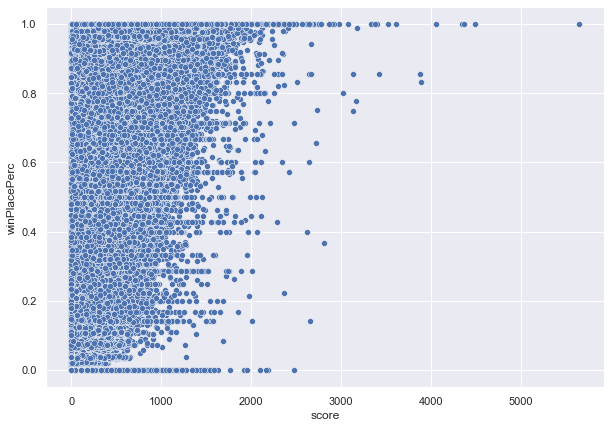

In [ ]:
scatterplot(df.score, df.winPlacePerc)

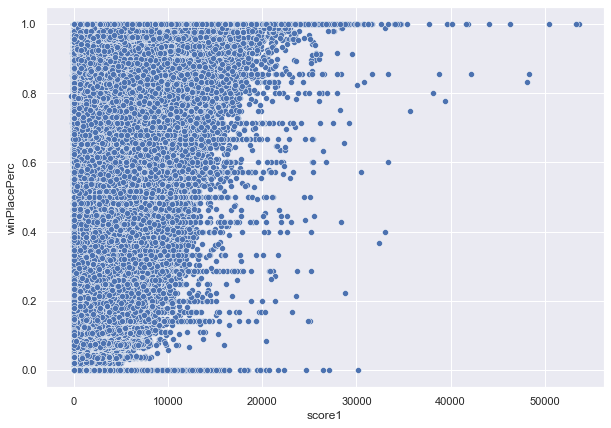

In [ ]:
scatterplot(df.score1, df.winPlacePerc)

In [ ]:
df_score = df[["winPlacePerc","score1"]]

In [ ]:
df_score = df[["winPlacePerc","score1"]]

In [ ]:
df_score.corr()

winPlacePerc    score1
winPlacePerc      1.000000  0.467034
score1            0.467034  1.000000

one-hot encoding
- 특정 columns만 1 주기 matchType

  1 : 'squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo'

In [ ]:
a=pd.get_dummies(df.matchType, columns=['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo'],drop_first=False)
a.crashfpp.value_counts()

0    4419087
1       6285
Name: crashfpp, dtype: int64

In [ ]:
len(df[df.matchType=="crashfpp"])

6285

### 기타 그래프

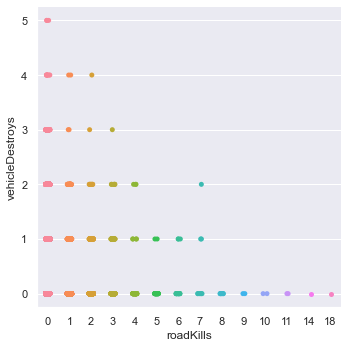

In [ ]:
sns.catplot(data=df_todo_concat, x="roadKills", y="vehicleDestroys")

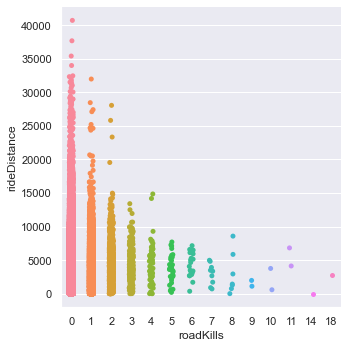

In [ ]:
sns.catplot(data=df_todo_concat, x="roadKills", y="rideDistance")

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicleDestroys', ylabel='count'>

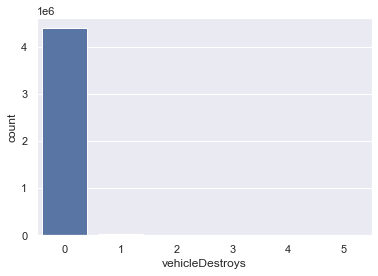

In [ ]:
sns.countplot(df.vehicleDestroys)

In [ ]:
print(df.winPlacePerc.mean())
print(df[df.vehicleDestroys==1].winPlacePerc.mean())
df[df.vehicleDestroys>1].winPlacePerc.mean()

nan
0.729


0.778

/Users/krc/miniforge3/envs/krc/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='roadKills', ylabel='count'>

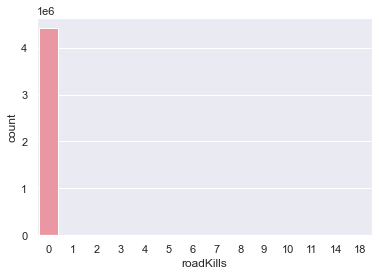

In [ ]:
sns.countplot(df.roadKills)